In [1]:
!pip install koreanize-matplotlib -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## Í∞ÄÏù¥Îìú Ïï°ÏÖò ÏÇ¨Ïö© Ïú†Ï†ÄÏôÄ ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä

### Í∞ÄÏù¥Îìú ÏÇ¨Ïö© & ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò

In [3]:
sort_log = pd.read_csv(r'C:\Users\user\.ipython\Ï±ÑÏö© ÌîåÎû´Ìèº ÌîÑÎ°úÏ†ùÌä∏\sort_log.csv', index_col=0)

In [4]:
application = pd.read_csv(r'C:\Users\user\.ipython\Ï±ÑÏö© ÌîåÎû´Ìèº ÌîÑÎ°úÏ†ùÌä∏\Application.csv', index_col=0)
application

cdate                          company_uuid  \
0              2017-02-25 23:45:01  de4b3596-b4ab-47cd-b8ea-6f9e14170064   
1       2020-11-23 14:46:07.329731  f6156b12-d4d7-469f-84be-31799c765211   
2       2017-10-28 22:30:10.631568  2ed05b18-c735-474a-9faa-02095b25729a   
3       2017-07-03 17:40:05.317255  3d6730ee-b869-47b7-90c6-1e074e4eb15b   
4              2017-02-10 10:53:39  de4b3596-b4ab-47cd-b8ea-6f9e14170064   
...                            ...                                   ...   
340725  2021-05-09 16:48:46.908545  214c0ee9-4fc9-46be-ba8a-2a0368510e80   
340726  2022-03-20 22:21:29.175182  214c0ee9-4fc9-46be-ba8a-2a0368510e80   
340727  2022-04-07 09:41:05.036134  565e7499-1070-49c5-a3b9-a27e5ca27a9e   
340728  2022-07-15 04:22:09.138346  79d4e2b6-e8df-4605-9c2c-b00e73698b61   
340729  2023-07-10 10:02:03.071155  1bf63e7b-f705-48ed-8958-a66508437d53   

                                    job_uuid  \
0       459e461d-a571-4ed3-8751-8f4cb5b9ff37   
1       e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f   
2       0f636d7a-53f7-485e-8a08-33253ddab380   
3       3cade56a-6354-411a-82a6-f2c7774539c1   
4       459e461d-a571-4ed3-8751-8f4cb5b9ff37   
...                                      ...   
340725  201fda38-4fbd-4541-aa27-c0a529e26c83   
340726  a82d7bd3-87ee-4eaf-9519-1b60a331a474   
340727  744ab632-8193-406a-bd51-3e2c9ddd4544   
340728  5faf63f9-848e-4286-a07c-992c0883115d   
340729  87cc225b-35b3-4105-8924-69e4fa678cda   

                                   user_uuid  \
0       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
1       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
2       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
3       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
4       a7593a15-b93e-4bc3-91bf-e4074c931d33   
...                                      ...   
340725  e5cb061e-3ca1-438a-8eb2-e50bd4f133e0   
340726  dc1fb548-59dd-47bc-82aa-99d92e70f793   
340727  1e311075-359d-40fd-b606-f74cb1819499   
340728  7ba43545-bf1c-465e-8996-e55231b020c6   
340729  f8ba6181-f53d-4d78-a0ea-f8a0eb84321f   

                            application_uuid  
0       59c42363-f764-4cbd-aafd-20eb663ea5d7  
1       425db0e8-87f8-4b4d-8248-7f24c31d49d3  
2       be4d9e85-dc53-4e70-90af-64d2d6b117d2  
3       d43879d1-c424-4192-9eae-4537fa6687cb  
4       61873fd7-f075-44c0-90fe-f6521226550d  
...                                      ...  
340725  ecd4d247-8e03-4830-a4e8-c1ecb68ddf74  
340726  0ab0adef-da09-4381-baf7-a3fb017c19ea  
340727  bbd1050f-3729-45d9-8404-c8ad75dc5131  
340728  43107da9-ff4d-4e62-9dd2-1b2df5a9ae78  
340729  6c6fc132-80a2-4322-8d71-90a376f52bd7  

[340730 rows x 5 columns]

In [5]:
sort_log[sort_log['action_type'].str.contains('Í∞ÄÏù¥Îìú-')]['user_uuid'].nunique()

4479

In [6]:
# 1. datetime Î≥ÄÌôò (ÌòºÌï© Ìè¨Îß∑ ÏßÄÏõê)
sort_log['timestamp'] = pd.to_datetime(sort_log['timestamp'], format='mixed', utc=True)

# 2. ÌïúÍµ≠ ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÌôò
sort_log['timestamp'] = sort_log['timestamp'].dt.tz_convert('Asia/Seoul')

# 3. ÎßàÏù¥ÌÅ¨Î°úÏ¥à Ï†úÍ±∞
sort_log['timestamp'] = sort_log['timestamp'].dt.floor('s')

In [7]:
guide_user = sort_log[sort_log['action_type'].str.contains('Í∞ÄÏù¥Îìú-')]['user_uuid'].unique()
guide_action_user = sort_log[sort_log['user_uuid'].isin(guide_user)]
non_guide_action_user = sort_log[~sort_log['user_uuid'].isin(guide_user)]
print(f'Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò:{guide_action_user['user_uuid'].nunique()}Î™Ö')
print(f'Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò:{non_guide_action_user['user_uuid'].nunique()}Î™Ö')

Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò:4479Î™Ö
Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò:16606Î™Ö


In [8]:
# Ïú†Ï†Ä Ïàò Í≥ÑÏÇ∞
total_user_counts = sort_log['user_uuid'].nunique()
guide_user_count = guide_action_user['user_uuid'].nunique()
non_guide_user_count = non_guide_action_user['user_uuid'].nunique()

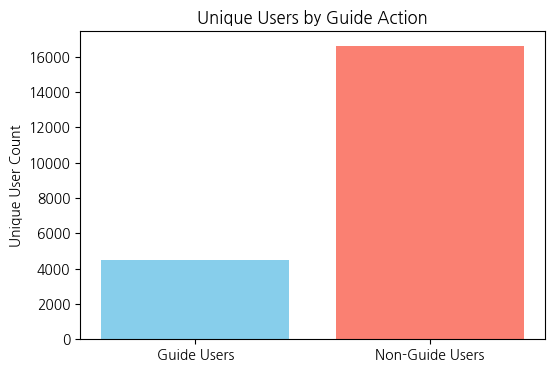

In [9]:
# ÎßâÎåÄ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 4))
plt.bar(['Guide Users', 'Non-Guide Users'], [guide_user_count, non_guide_user_count], color=['skyblue', 'salmon'])
plt.ylabel('Unique User Count')
plt.title('Unique Users by Guide Action')
plt.show()

### Í∞ÄÏù¥Îìú ÏÇ¨Ïö© & ÎØ∏ÏÇ¨Ïö© ÏßÄÏõêÏÑú Ï†úÏ∂ú Ïàò

In [10]:
guide_submit_count = guide_action_user[guide_action_user['action_type'] == 'ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å'].shape[0]
non_guide_submit_count = non_guide_action_user[non_guide_action_user['action_type'] == 'ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å'].shape[0]

In [11]:
guide_submit_apply_count = round(guide_submit_count / guide_user_count, 2)
non_guide_submit_apply_count = round(non_guide_submit_count / non_guide_user_count, 2)

print(f'Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†ÄÏùò ÏßÄÏõêÏÑú Ï†úÏ∂ú Ïàò: ÏïΩ {guide_submit_apply_count}Í∞ú')
print(f'Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†ÄÏùò ÏßÄÏõêÏÑú Ï†úÏ∂ú Ïàò: ÏïΩ {non_guide_submit_apply_count}Í∞ú')

Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†ÄÏùò ÏßÄÏõêÏÑú Ï†úÏ∂ú Ïàò: ÏïΩ 7.79Í∞ú
Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†ÄÏùò ÏßÄÏõêÏÑú Ï†úÏ∂ú Ïàò: ÏïΩ 2.88Í∞ú


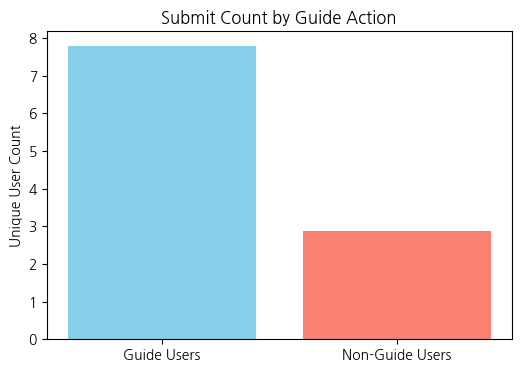

In [12]:
# ÎßâÎåÄ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 4))
plt.bar(['Guide Users', 'Non-Guide Users'], [guide_submit_apply_count, non_guide_submit_apply_count], color=['skyblue', 'salmon'])
plt.ylabel('Unique User Count')
plt.title('Submit Count by Guide Action')
plt.show()

In [13]:
sort_log

user_uuid  \
449898   0002535c-eacb-456b-a620-92c917332ba3   
449899   0002535c-eacb-456b-a620-92c917332ba3   
449945   0002535c-eacb-456b-a620-92c917332ba3   
449931   0002535c-eacb-456b-a620-92c917332ba3   
449907   0002535c-eacb-456b-a620-92c917332ba3   
...                                       ...   
1776702  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1776680  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1776610  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1776598  ffff25ca-c1d7-4fc2-891b-b0df92f95092   
1776594  ffff25ca-c1d7-4fc2-891b-b0df92f95092   

                                               URL                 timestamp  \
449898   @user_id?action=request_approval_complete 2022-01-15 16:44:06+09:00   
449899                       api/users/id/template 2022-01-15 16:44:08+09:00   
449945   @user_id?action=request_approval_complete 2022-03-01 14:45:33+09:00   
449931                       api/users/id/template 2022-03-01 14:45:35+09:00   
449907   @user_id?action=request_approval_complete 2022-04-19 00:12:10+09:00   
...                                            ...                       ...   
1776702                      api/users/id/template 2023-12-19 00:06:35+09:00   
1776680                                   @user_id 2023-12-19 00:06:36+09:00   
1776610                      api/users/id/template 2023-12-19 00:06:37+09:00   
1776598                                       jobs 2023-12-19 00:06:46+09:00   
1776594                   api/jobs/job_title?job=1 2023-12-19 00:06:47+09:00   

               date  response_code method                         prev_time  \
449898   2022-01-15            200    GET                               NaN   
449899   2022-01-15            200   POST  2022-01-15 16:44:06.150657+09:00   
449945   2022-03-01            200    GET  2022-01-15 16:44:08.578129+09:00   
449931   2022-03-01            200   POST  2022-03-01 14:45:33.359728+09:00   
449907   2022-04-19            200    GET  2022-03-01 14:45:35.489070+09:00   
...             ...            ...    ...                               ...   
1776702  2023-12-19            200   POST  2023-12-19 00:06:35.373638+09:00   
1776680  2023-12-19            200    GET  2023-12-19 00:06:35.877009+09:00   
1776610  2023-12-19            200   POST  2023-12-19 00:06:36.763225+09:00   
1776598  2023-12-19            200    GET  2023-12-19 00:06:37.210715+09:00   
1776594  2023-12-19            200    GET  2023-12-19 00:06:46.206558+09:00   

            time_diff  new_session  session_id            cleaned_URL  \
449898            NaN         True           1               @user_id   
449899   2.427472e+00        False           1  api/users/id/template   
449945   3.880885e+06         True           2               @user_id   
449931   2.129342e+00        False           2  api/users/id/template   
449907   4.181195e+06         True           3               @user_id   
...               ...          ...         ...                    ...   
1776702  5.033710e-01        False          97  api/users/id/template   
1776680  8.862160e-01        False          97               @user_id   
1776610  4.474900e-01        False          97  api/users/id/template   
1776598  8.995843e+00        False          97                   jobs   
1776594  8.052860e-01        False          97     api/jobs/job_title   

                             query_params action_type  
449898   action=request_approval_complete          Í∏∞ÌÉÄ  
449899                                NaN   ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï  
449945   action=request_approval_complete          Í∏∞ÌÉÄ  
449931                                NaN   ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï  
449907   action=request_approval_complete          Í∏∞ÌÉÄ  
...                                   ...         ...  
1776702                               NaN   ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï  
1776680                               NaN          Í∏∞ÌÉÄ  
1776610                               NaN   ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï  
1776598                     

In [14]:
sort_log.columns

Index(['user_uuid', 'URL', 'timestamp', 'date', 'response_code', 'method',
       'prev_time', 'time_diff', 'new_session', 'session_id', 'cleaned_URL',
       'query_params', 'action_type'],
      dtype='object')

In [15]:
guide_action_user['action_type'].unique()

array(['Í∏∞ÌÉÄ', 'ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï', 'Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏', 'ÏÑ§Ï†ï', 'Î≥∏Ïù∏Ïù∏Ï¶ù', 'Ï±ÑÏö© Í∏∞ÏóÖ ÌéòÏù¥ÏßÄ Ï°∞Ìöå',
       'ÏïåÎ¶º ÌôïÏù∏', 'Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå', 'Í∏∞ÏóÖ Íµ¨ÏÑ±Ïõê ÌîÑÎ°úÌïÑ Ï°∞Ìöå', 'ÏÜåÏÖú Í∏∞Îä•', 'Í≤ÄÏÉâ', 'Ï∂îÏ≤ú ÏÑúÎπÑÏä§',
       'Í∞ÄÏù¥Îìú-Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•', 'Í∞ÄÏù¥Îìú-Ïñ∏Ïñ¥ ÏûÖÎ†•', 'Í∞ÄÏù¥Îìú-Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•', 'Í∞ÄÏù¥Îìú-ÌéÄÎî© ÏûÖÎ†•',
       'ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏', 'Ï±ÑÏö© Í∏∞ÏóÖ Î∂ÅÎßàÌÅ¨', 'ÌöåÏõêÍ∞ÄÏûÖ ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'ÏßÄÏõê ÏßÑÌñâ ÏÉÅÌÉú ÌôïÏù∏', 'Í∞ÄÏù¥Îìú-Í∞úÏöî ÏûÖÎ†•',
       'Í∞ÄÏù¥Îìú-Í≤ΩÎ†• ÏûÖÎ†•', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step1', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step2', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step3',
       'ÏßÄÏõêÏÑú ÏûëÏÑ± - step4', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å', 'Ï±ÑÏö©Í≥µÍ≥† Î∂ÅÎßàÌÅ¨', 'ÌöåÏõêÍ∞ÄÏûÖÏôÑÎ£å',
       'ÏßÄÏõêÏÑú ÏûëÏÑ± - ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'Í∞ÄÏù¥Îìú-Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•', 'Îπà URL'], dtype=object)

## ÌçºÎÑêÎ∂ÑÏÑù

In [16]:
# ÏòàÏãú: ÏßÄÏõê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
funnel_steps = ['ÏßÄÏõêÏÑú ÏûëÏÑ± - step1', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step2',
                'ÏßÄÏõêÏÑú ÏûëÏÑ± - step3', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step4', 'ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å']

for step in funnel_steps:
    count_guide = guide_action_user[guide_action_user['action_type'] == step]['user_uuid'].nunique()
    count_non = non_guide_action_user[non_guide_action_user['action_type'] == step]['user_uuid'].nunique()
    print(f"{step}: Í∞ÄÏù¥Îìú Ïú†Ï†Ä={count_guide}, ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä={count_non}")


ÏßÄÏõêÏÑú ÏûëÏÑ± - step1: Í∞ÄÏù¥Îìú Ïú†Ï†Ä=3921, ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä=7466
ÏßÄÏõêÏÑú ÏûëÏÑ± - step2: Í∞ÄÏù¥Îìú Ïú†Ï†Ä=3846, ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä=6730
ÏßÄÏõêÏÑú ÏûëÏÑ± - step3: Í∞ÄÏù¥Îìú Ïú†Ï†Ä=3535, ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä=5859
ÏßÄÏõêÏÑú ÏûëÏÑ± - step4: Í∞ÄÏù¥Îìú Ïú†Ï†Ä=3778, ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä=6344
ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å: Í∞ÄÏù¥Îìú Ïú†Ï†Ä=3756, ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä=6272


In [17]:
# Î∂ÑÏÑùÌï† ÌçºÎÑê Îã®Í≥Ñ Ï†ïÏùò (step1Î∂ÄÌÑ∞ ÏãúÏûë)
funnel_steps = [
    'ÏßÄÏõêÏÑú ÏûëÏÑ± - step1',
    'ÏßÄÏõêÏÑú ÏûëÏÑ± - step2',
    'ÏßÄÏõêÏÑú ÏûëÏÑ± - step3',
    'ÏßÄÏõêÏÑú ÏûëÏÑ± - step4',
    'ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å'
]

# Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò ÏÑ∏Îäî Ìï®Ïàò
def count_users_by_step(df, steps):
    return [df[df['action_type'] == step]['user_uuid'].nunique() for step in steps]

# Í∞ÄÏù¥Îìú / ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†ÄÎ≥Ñ Ïú†Ï†Ä Ïàò Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
guide_counts = count_users_by_step(guide_action_user, funnel_steps)
non_guide_counts = count_users_by_step(non_guide_action_user, funnel_steps)

# Ï†ÑÌôòÏú® Î∞è Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_conversion_dropoff(counts):
    conversion_rates = []
    dropoff_rates = []
    for i in range(len(counts) - 1):
        prev = counts[i]
        curr = counts[i + 1]
        rate = curr / prev if prev != 0 else 0
        conversion_rates.append(round(rate, 3))
        dropoff_rates.append(round(1 - rate, 3))
    return conversion_rates, dropoff_rates

# Í≥ÑÏÇ∞
guide_conv, guide_drop = compute_conversion_dropoff(guide_counts)
non_guide_conv, non_guide_drop = compute_conversion_dropoff(non_guide_counts)

# Í≤∞Í≥ºÎ•º Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†•
conversion_labels = [f"{funnel_steps[i]} ‚Üí {funnel_steps[i+1]}" for i in range(len(funnel_steps)-1)]

result_df = pd.DataFrame({
    'Îã®Í≥Ñ': conversion_labels,
    'Í∞ÄÏù¥Îìú_Ï†ÑÌôòÏú®': guide_conv,
    'Í∞ÄÏù¥Îìú_Ïù¥ÌÉàÎ•†': guide_drop,
    'ÎπÑÍ∞ÄÏù¥Îìú_Ï†ÑÌôòÏú®': non_guide_conv,
    'ÎπÑÍ∞ÄÏù¥Îìú_Ïù¥ÌÉàÎ•†': non_guide_drop
})

print(result_df)

                                Îã®Í≥Ñ  Í∞ÄÏù¥Îìú_Ï†ÑÌôòÏú®  Í∞ÄÏù¥Îìú_Ïù¥ÌÉàÎ•†  ÎπÑÍ∞ÄÏù¥Îìú_Ï†ÑÌôòÏú®  ÎπÑÍ∞ÄÏù¥Îìú_Ïù¥ÌÉàÎ•†
0  ÏßÄÏõêÏÑú ÏûëÏÑ± - step1 ‚Üí ÏßÄÏõêÏÑú ÏûëÏÑ± - step2    0.981    0.019     0.901     0.099
1  ÏßÄÏõêÏÑú ÏûëÏÑ± - step2 ‚Üí ÏßÄÏõêÏÑú ÏûëÏÑ± - step3    0.919    0.081     0.871     0.129
2  ÏßÄÏõêÏÑú ÏûëÏÑ± - step3 ‚Üí ÏßÄÏõêÏÑú ÏûëÏÑ± - step4    1.069   -0.069     1.083    -0.083
3  ÏßÄÏõêÏÑú ÏûëÏÑ± - step4 ‚Üí ÏßÄÏõêÏÑú ÏûëÏÑ± - Ï†úÏ∂ú ÏôÑÎ£å    0.994    0.006     0.989     0.011


[step1 ‚Üí step2]  
  - Í∞ÄÏù¥Îìú: Ï†ÑÌôòÏú® 98.1%, Ïù¥ÌÉàÎ•† 1.9%  
  - ÎπÑÍ∞ÄÏù¥Îìú: Ï†ÑÌôòÏú® 90.1%, Ïù¥ÌÉàÎ•† 9.9%

[step2 ‚Üí step3]  
  - Í∞ÄÏù¥Îìú: Ï†ÑÌôòÏú® 91.9%, Ïù¥ÌÉàÎ•† 8.1%  
  - ÎπÑÍ∞ÄÏù¥Îìú: Ï†ÑÌôòÏú® 87.1%, Ïù¥ÌÉàÎ•† 12.9%

[step3 ‚Üí step4]  
  - Ï†ÑÌôòÏú®Ïù¥ 100%Î•º ÎÑòÎäî Ïù¥Ïú†Îäî Ï§ëÎ≥µ Ïú†Ï†Ä ÎòêÎäî Î°úÍ∑∏ ÎàÑÎùΩ ÎïåÎ¨∏  
  - Ïù¥Îü¥ Îïê **Í≥†Ïú† Ïú†Ï†Ä Ïàò ÎàÑÏ†Å Í∏∞Ï§ÄÏúºÎ°ú Í≥ÑÏÇ∞**ÌïòÍ±∞ÎÇò, **step1Î∂ÄÌÑ∞ Ï†úÏ∂ú ÏôÑÎ£åÍπåÏßÄ ÏùºÍ¥ÄÎêú Ïú†Ï†ÄÎßå ÌïÑÌÑ∞ÎßÅ**Ìï¥ÏÑú Î∂ÑÏÑù
  - step3 = Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†úÏ∂úÏù¥Îùº Í±¥ÎÑàÎõ∞Í∏∞ Í∞ÄÎä•

[step4 ‚Üí Ï†úÏ∂ú ÏôÑÎ£å]  
  - Í∞ÄÏù¥Îìú: Ï†ÑÌôòÏú® 99.4%  
  - ÎπÑÍ∞ÄÏù¥Îìú: Ï†ÑÌôòÏú® 98.9%


In [18]:
# step2Î•º ÏàòÌñâÌïú Ïú†Ï†ÄÎì§
step2_users = set(sort_log[sort_log['action_type'] == 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step2']['user_uuid'])

# step3Î•º ÏàòÌñâÌïú Ïú†Ï†ÄÎì§
step3_users = set(sort_log[sort_log['action_type'] == 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step3']['user_uuid'])

# step4Î•º ÏàòÌñâÌïú Ïú†Ï†ÄÎì§
step4_users = set(sort_log[sort_log['action_type'] == 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step4']['user_uuid'])

# step2Îäî ÌñàÏßÄÎßå step3Îäî Ïïà Ìïú Ïú†Ï†ÄÎì§ Ï§ë step4Îäî Ìïú ÏÇ¨Îûå Ï∞æÍ∏∞
skipped_step3 = step2_users - step3_users
skipped_and_completed = skipped_step3 & step4_users

print(f"step3Î•º Í±¥ÎÑàÎõ∞Í≥† step4Î•º ÏßÑÌñâÌïú Ïú†Ï†Ä Ïàò: {len(skipped_and_completed)}")

step3Î•º Í±¥ÎÑàÎõ∞Í≥† step4Î•º ÏßÑÌñâÌïú Ïú†Ï†Ä Ïàò: 1089


In [19]:
from scipy.stats import chi2_contingency

# Îã®Í≥Ñ ÏÑ†ÌÉù
step_start = 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step1'
step_next = 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step2'

# Ïú†Ï†Ä Ïàò Í≥ÑÏÇ∞
guide_total = guide_action_user[guide_action_user['action_type'] == step_start]['user_uuid'].nunique()
guide_converted = guide_action_user[guide_action_user['action_type'] == step_next]['user_uuid'].nunique()
guide_not_converted = guide_total - guide_converted

non_total = non_guide_action_user[non_guide_action_user['action_type'] == step_start]['user_uuid'].nunique()
non_converted = non_guide_action_user[non_guide_action_user['action_type'] == step_next]['user_uuid'].nunique()
non_not_converted = non_total - non_converted

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏö© Ìëú ÎßåÎì§Í∏∞
contingency = [
    [guide_converted, guide_not_converted],
    [non_converted, non_not_converted]
]

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print("Ïú†Ïùò ÏàòÏ§Ä 0.05 Í∏∞Ï§ÄÏúºÎ°ú", "Ï∞®Ïù¥ ÏûàÏùå (Ïú†Ïùò)" if p < 0.05 else "Ï∞®Ïù¥ ÏóÜÏùå (ÎπÑÏú†Ïùò)")


Chi-squared: 244.1393
p-value: 0.0000
Ïú†Ïùò ÏàòÏ§Ä 0.05 Í∏∞Ï§ÄÏúºÎ°ú Ï∞®Ïù¥ ÏûàÏùå (Ïú†Ïùò)


In [20]:
# Îã®Í≥Ñ ÏÑ†ÌÉù
step_start = 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step2'
step_next = 'ÏßÄÏõêÏÑú ÏûëÏÑ± - step3'

# Ïú†Ï†Ä Ïàò Í≥ÑÏÇ∞
guide_total = guide_action_user[guide_action_user['action_type'] == step_start]['user_uuid'].nunique()
guide_converted = guide_action_user[guide_action_user['action_type'] == step_next]['user_uuid'].nunique()
guide_not_converted = guide_total - guide_converted

non_total = non_guide_action_user[non_guide_action_user['action_type'] == step_start]['user_uuid'].nunique()
non_converted = non_guide_action_user[non_guide_action_user['action_type'] == step_next]['user_uuid'].nunique()
non_not_converted = non_total - non_converted

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏö© Ìëú ÎßåÎì§Í∏∞
contingency = [
    [guide_converted, guide_not_converted],
    [non_converted, non_not_converted]
]

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print("Ïú†Ïùò ÏàòÏ§Ä 0.05 Í∏∞Ï§ÄÏúºÎ°ú", "Ï∞®Ïù¥ ÏûàÏùå (Ïú†Ïùò)" if p < 0.05 else "Ï∞®Ïù¥ ÏóÜÏùå (ÎπÑÏú†Ïùò)")

Chi-squared: 57.6400
p-value: 0.0000
Ïú†Ïùò ÏàòÏ§Ä 0.05 Í∏∞Ï§ÄÏúºÎ°ú Ï∞®Ïù¥ ÏûàÏùå (Ïú†Ïùò)


In [21]:
import plotly.express as px

# 1. Í∞ÄÏù¥Îìú Ïï°ÏÖò ÏÇ¨Ïö© Ïú†Ï†ÄÏôÄ ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
guide_action_user['funnel_step'] = guide_action_user['action_type'].apply(
    lambda x: next((step for step in funnel_steps if step in x), None)
)

non_guide_action_user['funnel_step'] = non_guide_action_user['action_type'].apply(
    lambda x: next((step for step in funnel_steps if step in x), None)
)

# 2. ÌçºÎÑê Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (Ïú†Ï†Ä Ïàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞)
def create_funnel_data_with_ratio(df, group_label):
    funnel_data = df.groupby('funnel_step')['user_uuid'].nunique().reset_index()
    funnel_data['group'] = group_label
    funnel_data = funnel_data.sort_values('funnel_step')
    
    # Ï≤´ Î≤àÏß∏ Îã®Í≥ÑÏùò Ïú†Ï†Ä ÏàòÎ°ú ÎπÑÏú® Í≥ÑÏÇ∞
    funnel_data['ratio'] = funnel_data['user_uuid'] / funnel_data['user_uuid'].iloc[0]
    return funnel_data

# Í∞ÄÏù¥Îìú Ïï°ÏÖò ÏÇ¨Ïö© Ïú†Ï†Ä
guide_funnel_data = create_funnel_data_with_ratio(guide_action_user, 'Í∞ÄÏù¥Îìú Ïï°ÏÖò ÏÇ¨Ïö©')

# Í∞ÄÏù¥Îìú Ïï°ÏÖò ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä
non_guide_funnel_data = create_funnel_data_with_ratio(non_guide_action_user, 'Í∞ÄÏù¥Îìú Ïï°ÏÖò ÎØ∏ÏÇ¨Ïö©')

# 3. Îëê Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
funnel_data = pd.concat([guide_funnel_data, non_guide_funnel_data])

# 4. ÌçºÎÑê ÏãúÍ∞ÅÌôî (ÎπÑÏú® Ìè¨Ìï®)
fig = px.funnel(funnel_data, x='ratio', y='funnel_step', color='group',
                title="Í∞ÄÏù¥Îìú Ïï°ÏÖò ÏÇ¨Ïö© vs ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä ÌçºÎÑê Î∂ÑÏÑù (ÎπÑÏú® Ìè¨Ìï®)",
                labels={"ratio": "ÎÇ®ÏïÑÏûàÎäî ÎπÑÏú®", "funnel_step": "ÌçºÎÑê Îã®Í≥Ñ"})
fig.show()


C:\Users\user\AppData\Local\Temp\ipykernel_30200\2174765969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guide_action_user['funnel_step'] = guide_action_user['action_type'].apply(
C:\Users\user\AppData\Local\Temp\ipykernel_30200\2174765969.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_guide_action_user['funnel_step'] = non_guide_action_user['action_type'].apply(


- step3Îäî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ï†úÏ∂ú(ÏÑ†ÌÉùÏ†Å Î∂ÄÎ∂Ñ)

In [22]:
def generate_retention_matrix(user_log_df, filtered_application):
    # Ï§ëÎ≥µ Ï†úÍ±∞
    user_uuids = user_log_df['user_uuid'].drop_duplicates()
    
    # Ìï¥Îãπ Ïú†Ï†ÄÎì§Ïùò ÏßÄÏõê Í∏∞Î°ùÎßå ÌïÑÌÑ∞ÎßÅ
    user_applications = filtered_application[filtered_application['user_uuid'].isin(user_uuids)].copy()

    # Ïú†Ï†ÄÎ≥Ñ Ï≤´ ÏßÄÏõêÏùº
    user_applications['first_application_date'] = user_applications.groupby('user_uuid')['cdate_kst'].transform('min')

    # ÏΩîÌò∏Ìä∏ Ïõî
    user_applications['cohort_month'] = user_applications['first_application_date'].dt.to_period('M').apply(lambda r: r.start_time)

    # Ïõî Î≤îÏúÑ Í≥ÑÏÇ∞
    user_applications['days_since_first'] = (user_applications['cdate_kst'] - user_applications['first_application_date']).dt.days
    user_applications['month_range'] = user_applications['days_since_first'] // 30

    # Ï§ëÎ≥µ Ï†úÍ±∞
    cohort = user_applications.drop_duplicates(['user_uuid', 'cohort_month', 'month_range'])

    # Í∞Å ÏΩîÌò∏Ìä∏ Ï¥ù Ïú†Ï†Ä Ïàò
    cohort_sizes = cohort.groupby('cohort_month')['user_uuid'].nunique().reset_index(name='total_users')

    # Î¶¨ÌÖêÏÖò Ïàò
    retention_counts = cohort.groupby(['cohort_month', 'month_range'])['user_uuid'].nunique().reset_index(name='retained_users')

    # Î≥ëÌï© ÌõÑ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
    retention_df = retention_counts.merge(cohort_sizes, on='cohort_month')
    retention_df['retention'] = retention_df['retained_users'] / retention_df['total_users']

    # ÌîºÎ≤ó
    retention_matrix = retention_df.pivot(index='cohort_month', columns='month_range', values='retention')
    
    return retention_matrix


## ÏõîÎã®ÏúÑ range retention(Í∞ÄÏù¥ÎìúÏï°ÏÖò ÏÇ¨Ïö© Ïú†Î¨¥)

In [23]:
application

cdate                          company_uuid  \
0              2017-02-25 23:45:01  de4b3596-b4ab-47cd-b8ea-6f9e14170064   
1       2020-11-23 14:46:07.329731  f6156b12-d4d7-469f-84be-31799c765211   
2       2017-10-28 22:30:10.631568  2ed05b18-c735-474a-9faa-02095b25729a   
3       2017-07-03 17:40:05.317255  3d6730ee-b869-47b7-90c6-1e074e4eb15b   
4              2017-02-10 10:53:39  de4b3596-b4ab-47cd-b8ea-6f9e14170064   
...                            ...                                   ...   
340725  2021-05-09 16:48:46.908545  214c0ee9-4fc9-46be-ba8a-2a0368510e80   
340726  2022-03-20 22:21:29.175182  214c0ee9-4fc9-46be-ba8a-2a0368510e80   
340727  2022-04-07 09:41:05.036134  565e7499-1070-49c5-a3b9-a27e5ca27a9e   
340728  2022-07-15 04:22:09.138346  79d4e2b6-e8df-4605-9c2c-b00e73698b61   
340729  2023-07-10 10:02:03.071155  1bf63e7b-f705-48ed-8958-a66508437d53   

                                    job_uuid  \
0       459e461d-a571-4ed3-8751-8f4cb5b9ff37   
1       e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f   
2       0f636d7a-53f7-485e-8a08-33253ddab380   
3       3cade56a-6354-411a-82a6-f2c7774539c1   
4       459e461d-a571-4ed3-8751-8f4cb5b9ff37   
...                                      ...   
340725  201fda38-4fbd-4541-aa27-c0a529e26c83   
340726  a82d7bd3-87ee-4eaf-9519-1b60a331a474   
340727  744ab632-8193-406a-bd51-3e2c9ddd4544   
340728  5faf63f9-848e-4286-a07c-992c0883115d   
340729  87cc225b-35b3-4105-8924-69e4fa678cda   

                                   user_uuid  \
0       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
1       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
2       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
3       b0329bd7-fc45-4e83-993a-b73bd9d3549c   
4       a7593a15-b93e-4bc3-91bf-e4074c931d33   
...                                      ...   
340725  e5cb061e-3ca1-438a-8eb2-e50bd4f133e0   
340726  dc1fb548-59dd-47bc-82aa-99d92e70f793   
340727  1e311075-359d-40fd-b606-f74cb1819499   
340728  7ba43545-bf1c-465e-8996-e55231b020c6   
340729  f8ba6181-f53d-4d78-a0ea-f8a0eb84321f   

                            application_uuid  
0       59c42363-f764-4cbd-aafd-20eb663ea5d7  
1       425db0e8-87f8-4b4d-8248-7f24c31d49d3  
2       be4d9e85-dc53-4e70-90af-64d2d6b117d2  
3       d43879d1-c424-4192-9eae-4537fa6687cb  
4       61873fd7-f075-44c0-90fe-f6521226550d  
...                                      ...  
340725  ecd4d247-8e03-4830-a4e8-c1ecb68ddf74  
340726  0ab0adef-da09-4381-baf7-a3fb017c19ea  
340727  bbd1050f-3729-45d9-8404-c8ad75dc5131  
340728  43107da9-ff4d-4e62-9dd2-1b2df5a9ae78  
340729  6c6fc132-80a2-4322-8d71-90a376f52bd7  

[340730 rows x 5 columns]

In [24]:
# 1. datetime Î≥ÄÌôò (ÌòºÌï© Ìè¨Îß∑ ÏßÄÏõê)
application['cdate'] = pd.to_datetime(application['cdate'], format='mixed', utc=True)

# 2. ÌïúÍµ≠ ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÌôò
application['cdate_kst'] = application['cdate'].dt.tz_convert('Asia/Seoul')

# 3. ÎßàÏù¥ÌÅ¨Î°úÏ¥à Ï†úÍ±∞
application['cdate_kst'] = application['cdate_kst'].dt.floor('s')


In [25]:
# ÏòàÏãú: application_logÎäî Ï†ÑÏ≤¥ ÏßÄÏõê Ïù¥Î†•
filtered_application = application.copy()

# ÌòπÏùÄ ÎÇ†Ïßú, Ïù¥ÏÉÅÏπò ÌïÑÌÑ∞ÎßÅ
filtered_application = application[application['cdate'] >= '2022-01-01']

In [26]:
# Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†Ä Î™©Î°ù
guide_user = sort_log[sort_log['action_type'].str.contains('Í∞ÄÏù¥Îìú-')]['user_uuid'].unique()

# Í∞ÄÏù¥Îìú ÏÇ¨Ïö©/ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Î°úÍ∑∏
guide_action_user = sort_log[sort_log['user_uuid'].isin(guide_user)]
non_guide_action_user = sort_log[~sort_log['user_uuid'].isin(guide_user)]

print(f'Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò: {guide_action_user["user_uuid"].nunique()}Î™Ö')
print(f'Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò: {non_guide_action_user["user_uuid"].nunique()}Î™Ö')

# Í∞ÅÍ∞ÅÏùò Î¶¨ÌÖêÏÖò ÌñâÎ†¨ ÏÉùÏÑ±
guide_retention_matrix = generate_retention_matrix(guide_action_user, filtered_application)
non_guide_retention_matrix = generate_retention_matrix(non_guide_action_user, filtered_application)


Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò: 4479Î™Ö
Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Ïàò: 16606Î™Ö


C:\Users\user\AppData\Local\Temp\ipykernel_30200\600926377.py:12: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\user\AppData\Local\Temp\ipykernel_30200\600926377.py:12: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [27]:
def plot_retention_heatmap(retention_matrix, title):
    plt.figure(figsize=(18, 8))
    sns.heatmap(
        retention_matrix,
        annot=True,
        fmt='.1%',
        cmap='YlGnBu',
        cbar=False,
        mask=retention_matrix.isna()
    )
    plt.title(title, fontsize=16)
    plt.xlabel('Ï≤´ ÏßÄÏõê Ïù¥ÌõÑ Í∞úÏõî Ïàò')
    plt.ylabel('Ï≤´ ÏßÄÏõê Ïõî')

    yticks = plt.yticks()[0]
    plt.yticks(yticks, [pd.to_datetime(tick).strftime('%Y-%m') for tick in retention_matrix.index])
    plt.tight_layout()
    plt.show()

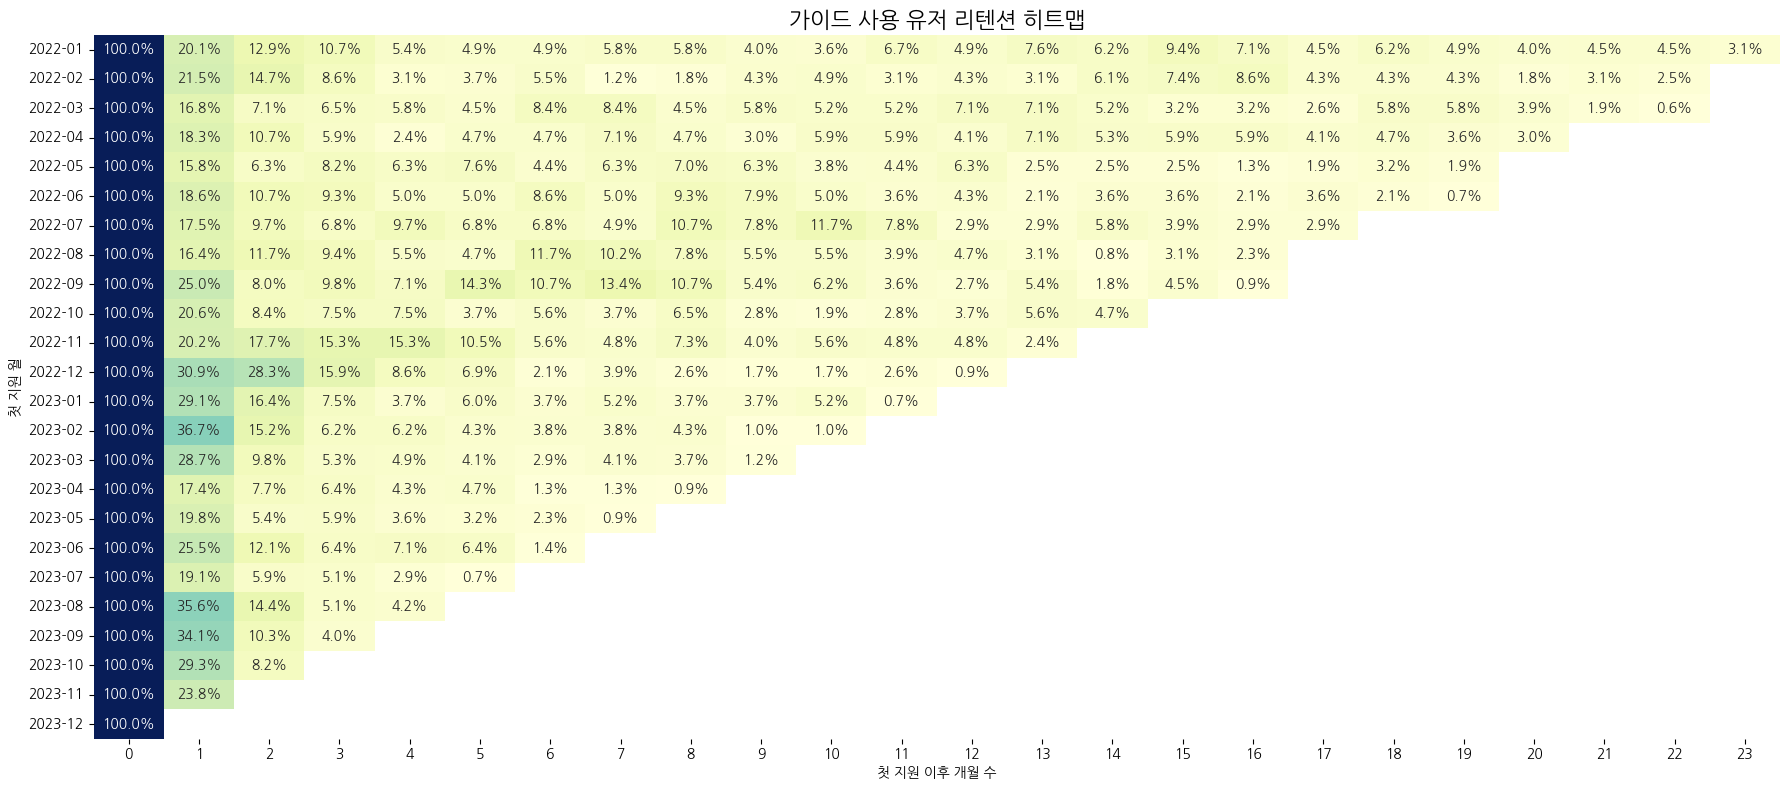

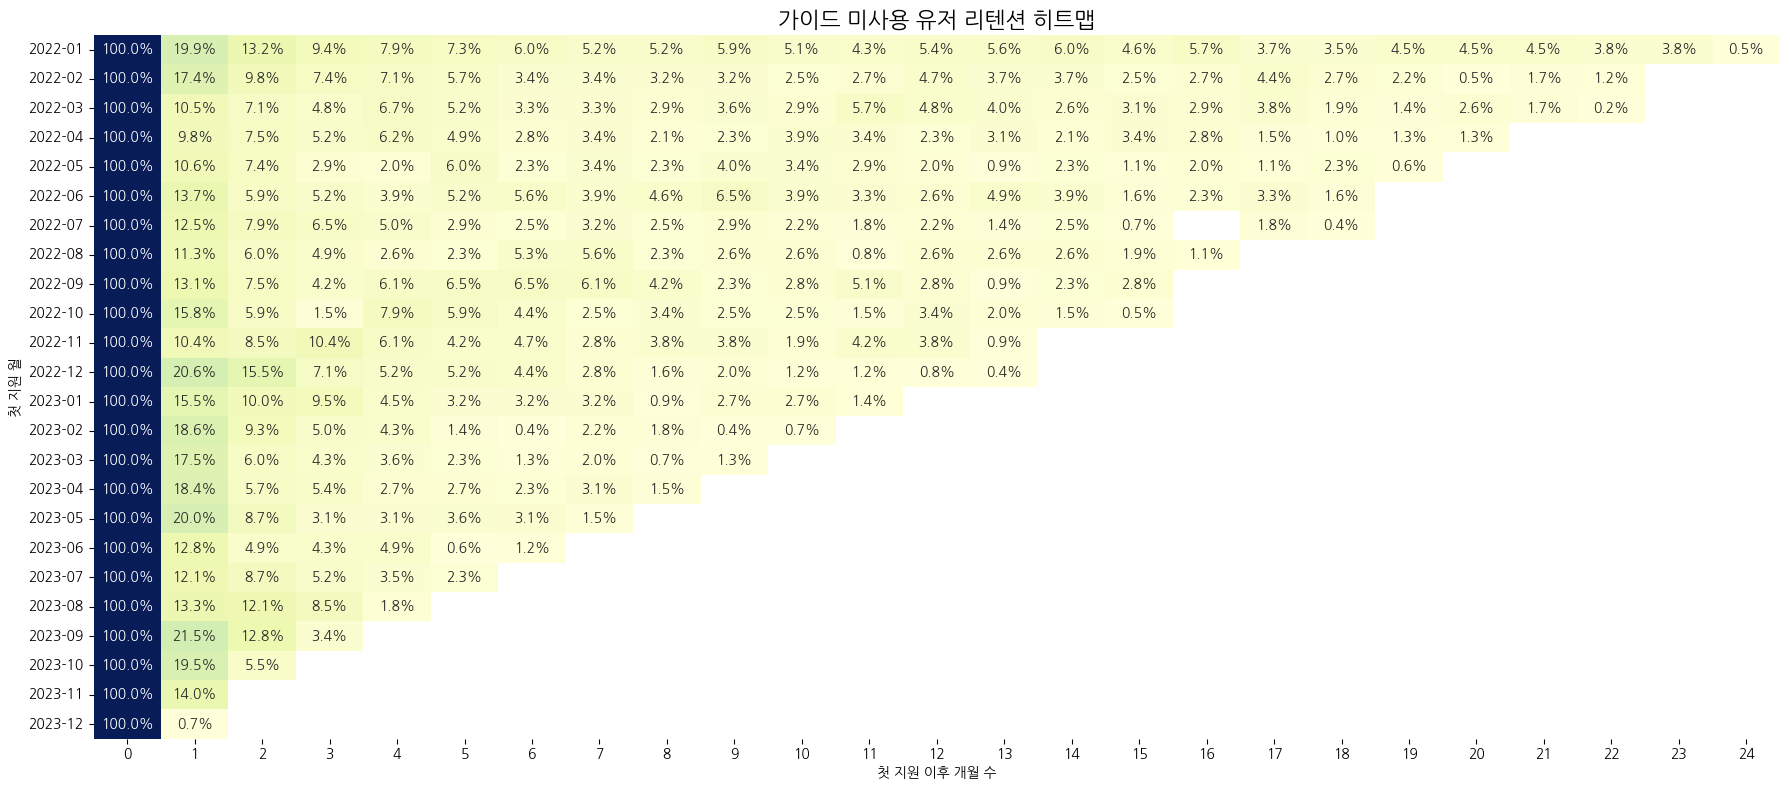

In [28]:
plot_retention_heatmap(guide_retention_matrix, 'Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïú†Ï†Ä Î¶¨ÌÖêÏÖò ÌûàÌä∏Îßµ')
plot_retention_heatmap(non_guide_retention_matrix, 'Í∞ÄÏù¥Îìú ÎØ∏ÏÇ¨Ïö© Ïú†Ï†Ä Î¶¨ÌÖêÏÖò ÌûàÌä∏Îßµ')

In [29]:
# 1. datetime Î≥ÄÌôò (ÌòºÌï© Ìè¨Îß∑ ÏßÄÏõê)
application['cdate'] = pd.to_datetime(application['cdate'], format='mixed', utc=True)

# 2. ÌïúÍµ≠ ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÌôò
application['cdate_kst'] = application['cdate'].dt.tz_convert('Asia/Seoul')

# 3. ÎßàÏù¥ÌÅ¨Î°úÏ¥à Ï†úÍ±∞
application['cdate_kst'] = application['cdate_kst'].dt.floor('s')

In [30]:
# Í∞ÄÏù¥Îìú Ïú†Ï†Ä Î¶¨Ïä§Ìä∏
guide_user = sort_log[sort_log['action_type'].str.contains('Í∞ÄÏù¥Îìú-')]['user_uuid'].unique()

# Í∞ÄÏù¥Îìú Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
sort_log['is_guide_user'] = sort_log['user_uuid'].isin(guide_user)

# ÏãúÍ∞ÑÎåÄ (0~23Ïãú) Ï∂îÏ∂ú
sort_log['hour'] = pd.to_datetime(sort_log['timestamp']).dt.hour

In [31]:
# ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÅ¥Î¶≠ Ïàò ÏßëÍ≥Ñ
hourly_clicks = (
    sort_log.groupby(['hour', 'is_guide_user'])['user_uuid']
    .count()
    .reset_index(name='clicks')
)

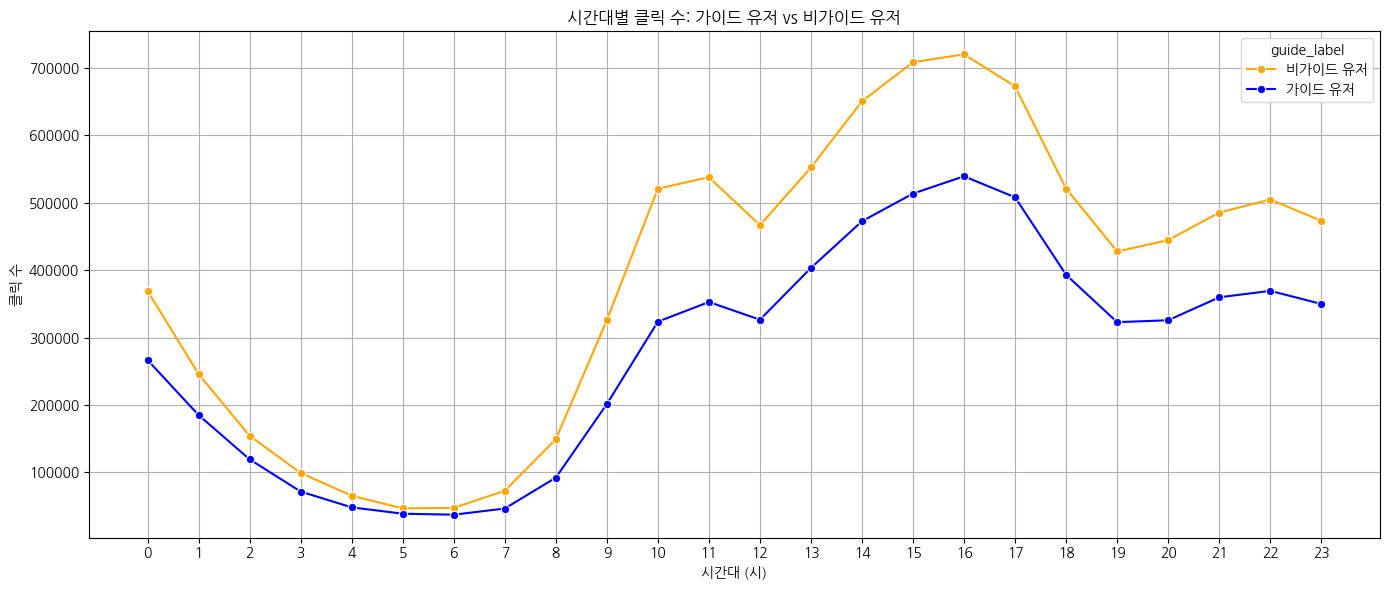

In [32]:
# Í∞ÄÎèÖÏÑ± ÏûàÎäî Ïª¨Îüº Ï∂îÍ∞Ä
hourly_clicks['guide_label'] = hourly_clicks['is_guide_user'].map({True: 'Í∞ÄÏù¥Îìú Ïú†Ï†Ä', False: 'ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä'})

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=hourly_clicks,
    x='hour',
    y='clicks',
    hue='guide_label',
    palette={'Í∞ÄÏù¥Îìú Ïú†Ï†Ä': 'blue', 'ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä': 'orange'},
    marker='o'
)

plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÅ¥Î¶≠ Ïàò: Í∞ÄÏù¥Îìú Ïú†Ï†Ä vs ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä')
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)')
plt.ylabel('ÌÅ¥Î¶≠ Ïàò')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_30200\1390418072.py:38: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) NanumGothic.

c:\Users\user\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) NanumGothic.



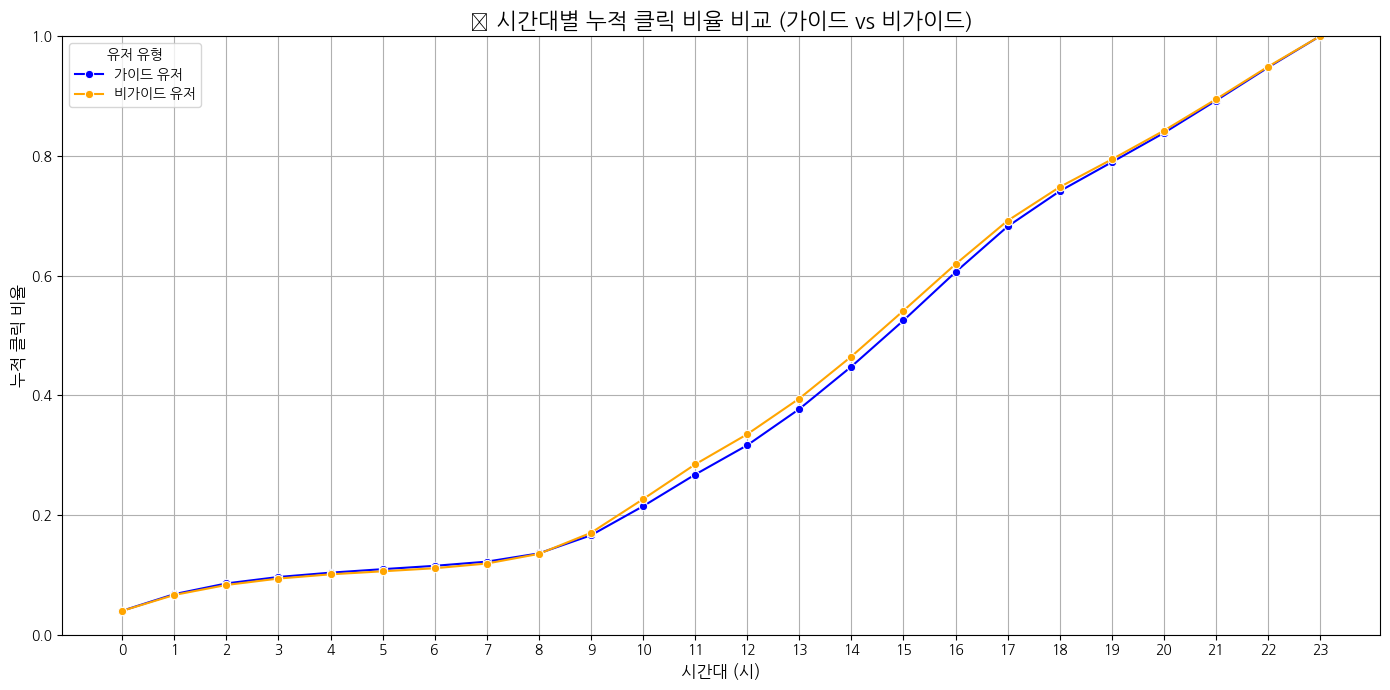

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Í∞ÄÏù¥Îìú/ÎπÑÍ∞ÄÏù¥Îìú Î∂ÑÎ¶¨
guide_clicks = sort_log[sort_log['is_guide_user'] == True]
non_guide_clicks = sort_log[sort_log['is_guide_user'] == False]

# 3. Ï¥ù ÌÅ¥Î¶≠ Ïàò
total_guide_clicks = guide_clicks.shape[0]
total_non_guide_clicks = non_guide_clicks.shape[0]

# 4. ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌÅ¥Î¶≠ Ïàò ‚Üí ÎπÑÏú®
guide_hourly_clicks = guide_clicks['hour'].value_counts().sort_index()
non_guide_hourly_clicks = non_guide_clicks['hour'].value_counts().sort_index()

guide_hourly_ratio = guide_hourly_clicks / total_guide_clicks
non_guide_hourly_ratio = non_guide_hourly_clicks / total_non_guide_clicks

# 5. ÎàÑÏ†Å ÎπÑÏú® Í≥ÑÏÇ∞
guide_cum_ratio = guide_hourly_ratio.cumsum()
non_guide_cum_ratio = non_guide_hourly_ratio.cumsum()

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 7))

sns.lineplot(x=guide_cum_ratio.index, y=guide_cum_ratio, label='Í∞ÄÏù¥Îìú Ïú†Ï†Ä', color='blue', marker='o')
sns.lineplot(x=non_guide_cum_ratio.index, y=non_guide_cum_ratio, label='ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä', color='orange', marker='o')

plt.title('‚è∞ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎàÑÏ†Å ÌÅ¥Î¶≠ ÎπÑÏú® ÎπÑÍµê (Í∞ÄÏù¥Îìú vs ÎπÑÍ∞ÄÏù¥Îìú)', fontsize=16)
plt.xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=12)
plt.ylabel('ÎàÑÏ†Å ÌÅ¥Î¶≠ ÎπÑÏú®', fontsize=12)
plt.xticks(range(0, 24))
plt.ylim(0, 1)
plt.legend(title='Ïú†Ï†Ä Ïú†Ìòï')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Ïú†Ï†ÄÎ≥Ñ ÏßÄÏõê ÌöüÏàò Í≥ÑÏÇ∞
apply_counts = application.groupby('user_uuid')['cdate'].count().reset_index(name='apply_count')

# Í∞ÄÏù¥Îìú Ïó¨Î∂Ä Ï∂îÍ∞Ä
apply_counts['is_guide_user'] = apply_counts['user_uuid'].isin(guide_user)

# ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò ÎπÑÍµê
print(apply_counts.groupby('is_guide_user')['apply_count'].mean())

# Ïû¨ÏßÄÏõê Ïó¨Î∂Ä (2Î≤à Ïù¥ÏÉÅ ÏßÄÏõêÌïú Ïú†Ï†Ä ÎπÑÏú®)
apply_counts['is_reapply'] = apply_counts['apply_count'] >= 2
reapply_rate = apply_counts.groupby('is_guide_user')['is_reapply'].mean()
print(reapply_rate)


is_guide_user
False     8.996372
True     11.290467
Name: apply_count, dtype: float64
is_guide_user
False    0.579977
True     0.793481
Name: is_reapply, dtype: float64


- Í∞ÄÏù¥Îìú Ïï°ÏÖòÏùÑ ÏÇ¨Ïö©Ìïú Ïú†Ï†ÄÍ∞Ä ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎ≥¥Îã§ ÌèâÍ∑† ÏßÄÏõêÏÑú Ï†úÏ∂ú ÏàòÍ∞Ä ÎÜíÍ≥†, Ïû¨ÏßÄÏõê ÎπÑÏú®ÎèÑ Îçî ÎÜíÏùÄ Í≤ÉÏúºÎ°ú ÌååÏïÖÎê®

In [35]:
# ÏßÄÏõê Î°úÍ∑∏ Ï†ïÎ†¨
sorted_app = application.sort_values(['user_uuid', 'cdate_kst'])

# Ïú†Ï†ÄÎ≥Ñ ÏßÄÏõê Í∞Ñ ÏãúÍ∞ÑÏ∞® Í≥ÑÏÇ∞
sorted_app['prev_apply_time'] = sorted_app.groupby('user_uuid')['cdate_kst'].shift(1)
sorted_app['gap_days'] = (sorted_app['cdate_kst'] - sorted_app['prev_apply_time']).dt.days

# ÌèâÍ∑† Í∞ÑÍ≤© Í≥ÑÏÇ∞
avg_gap = (
    sorted_app.groupby('user_uuid')['gap_days']
    .mean()
    .reset_index(name='avg_gap_days')
)

# Í∞ÄÏù¥Îìú Ïó¨Î∂Ä Ï∂îÍ∞Ä
avg_gap['is_guide_user'] = avg_gap['user_uuid'].isin(guide_user)

# ÌèâÍ∑† ÎπÑÍµê
print(avg_gap.groupby('is_guide_user')['avg_gap_days'].mean())


is_guide_user
False    48.196614
True     34.968689
Name: avg_gap_days, dtype: float64


- Í∞ÄÏù¥Îìú Ïï°ÏÖòÏùÑ ÏÇ¨Ïö©Ìïú Ïú†Ï†ÄÍ∞Ä Îçî Îπ†Î•∏ ÏãúÏùº ÎÇ¥Ïóê Ïû¨ÏßÄÏõêÏùÑ ÌïòÎäî Í≤ÉÏúºÎ°ú ÌååÏïÖÎê®

## AB ÌÖåÏä§Ìä∏

In [36]:
from scipy.stats import ttest_ind

# Ïú†Ï†ÄÎ≥Ñ ÏßÄÏõê ÌöüÏàò
apply_counts = application.groupby('user_uuid')['cdate'].count().reset_index(name='apply_count')
apply_counts['is_guide_user'] = apply_counts['user_uuid'].isin(guide_user)

# A/B Í∑∏Î£π Î∂ÑÎ¶¨
group_A = apply_counts[apply_counts['is_guide_user'] == False]['apply_count']
group_B = apply_counts[apply_counts['is_guide_user'] == True]['apply_count']

# ÌèâÍ∑† + T-test
mean_A = group_A.mean()
mean_B = group_B.mean()
t_stat, p_value = ttest_ind(group_B, group_A, equal_var=False)

print(f"üìå ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò")
print(f"ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: {mean_A:.2f}Ìöå")
print(f"Í∞ÄÏù¥Îìú Ïú†Ï†Ä: {mean_B:.2f}Ìöå")
print(f"p-value = {p_value:.4f}")

üìå ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò
ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: 9.00Ìöå
Í∞ÄÏù¥Îìú Ïú†Ï†Ä: 11.29Ìöå
p-value = 0.0912


In [37]:
from scipy.stats import chi2_contingency

# Ïû¨ÏßÄÏõê Ïó¨Î∂Ä
apply_counts['is_reapply'] = apply_counts['apply_count'] >= 2

# ÍµêÏ∞®Ìëú
reapply_table = pd.crosstab(apply_counts['is_guide_user'], apply_counts['is_reapply'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p_chi, _, _ = chi2_contingency(reapply_table)

# Ïû¨ÏßÄÏõêÎ•†
reapply_rate = apply_counts.groupby('is_guide_user')['is_reapply'].mean()

print(f"\nüìå Ïû¨ÏßÄÏõê ÎπÑÏú®")
print(f"ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: {reapply_rate[False]:.2%}")
print(f"Í∞ÄÏù¥Îìú Ïú†Ï†Ä: {reapply_rate[True]:.2%}")
print(f"p-value = {p_chi:.4f}")


üìå Ïû¨ÏßÄÏõê ÎπÑÏú®
ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: 58.00%
Í∞ÄÏù¥Îìú Ïú†Ï†Ä: 79.35%
p-value = 0.0000


In [38]:
from scipy.stats import mannwhitneyu

# Ïú†Ï†ÄÎ≥Ñ ÏßÄÏõê Í∞Ñ Í∞ÑÍ≤© Í≥ÑÏÇ∞
sorted_app = application.sort_values(['user_uuid', 'cdate_kst'])
sorted_app['prev_time'] = sorted_app.groupby('user_uuid')['cdate_kst'].shift(1)
sorted_app['gap_days'] = (sorted_app['cdate_kst'] - sorted_app['prev_time']).dt.days

# ÌèâÍ∑† gap Í≥ÑÏÇ∞
gap_avg = sorted_app.groupby('user_uuid')['gap_days'].mean().dropna().reset_index(name='avg_gap_days')
gap_avg['is_guide_user'] = gap_avg['user_uuid'].isin(guide_user)

# Í∑∏Î£π Î∂ÑÎ¶¨
gap_A = gap_avg[gap_avg['is_guide_user'] == False]['avg_gap_days']
gap_B = gap_avg[gap_avg['is_guide_user'] == True]['avg_gap_days']

# ÌèâÍ∑† + ÌÜµÍ≥ÑÍ≤ÄÏ†ï
print(f"\nüìå ÌèâÍ∑† ÏßÄÏõê Í∞ÑÍ≤©")
print(f"ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: {gap_A.mean():.1f}Ïùº")
print(f"Í∞ÄÏù¥Îìú Ïú†Ï†Ä: {gap_B.mean():.1f}Ïùº")
u_stat, p_gap = mannwhitneyu(gap_B, gap_A, alternative='two-sided')
print(f"p-value = {p_gap:.4f}")



üìå ÌèâÍ∑† ÏßÄÏõê Í∞ÑÍ≤©
ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: 48.2Ïùº
Í∞ÄÏù¥Îìú Ïú†Ï†Ä: 35.0Ïùº
p-value = 0.2360


In [39]:
result_df = pd.DataFrame({
    'ÏßÄÌëú': ['ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò', 'Ïû¨ÏßÄÏõê ÎπÑÏú®', 'ÌèâÍ∑† ÏßÄÏõê Í∞ÑÍ≤© (Ïùº)'],
    'ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä': [mean_A, reapply_rate[False], gap_A.mean()],
    'Í∞ÄÏù¥Îìú Ïú†Ï†Ä': [mean_B, reapply_rate[True], gap_B.mean()],
    'p-value': [p_value, p_chi, p_gap]
})

# Î≥ÄÌôîÏú® Ï∂îÍ∞Ä
result_df['Î≥ÄÌôîÏú®'] = ((result_df['Í∞ÄÏù¥Îìú Ïú†Ï†Ä'] - result_df['ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä']) / result_df['ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä']) * 100
result_df['Î≥ÄÌôîÏú®'] = result_df['Î≥ÄÌôîÏú®'].map('{:.1f}%'.format)

result_df

ÏßÄÌëú    ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä     Í∞ÄÏù¥Îìú Ïú†Ï†Ä        p-value     Î≥ÄÌôîÏú®
0      ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò   8.996372  11.290467   9.124113e-02   25.5%
1        Ïû¨ÏßÄÏõê ÎπÑÏú®   0.579977   0.793481  4.103811e-165   36.8%
2  ÌèâÍ∑† ÏßÄÏõê Í∞ÑÍ≤© (Ïùº)  48.196614  34.968689   2.360342e-01  -27.4%

- Í∞ÄÏù¥Îìú Í∏∞Îä•ÏùÑ Í≤ΩÌóòÌïú Ïú†Ï†ÄÎäî ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä ÎåÄÎπÑ 36.8% Îçî ÎÜíÏùÄ Ïû¨ÏßÄÏõêÎ•†ÏùÑ Î≥¥ÏòÄÍ≥†, Ïù¥Îäî p<0.0001 ÏàòÏ§ÄÏúºÎ°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§.
- Î∞òÎ©¥ ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò Î∞è ÏßÄÏõê Í∞ÑÍ≤©ÏùÄ Í∞ÄÏù¥Îìú Ïú†Ï†ÄÏóêÏÑú Îçî Ï¢ãÏùÄ ÏÑ±Í≥ºÎ•º Î≥¥ÏòÄÏßÄÎßå, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî Ïú†ÏùòÌïòÏßÄ ÏïäÏïòÎã§.
- Ïù¥Îäî Í∞ÄÏù¥Îìú Í∏∞Îä•Ïù¥ ÏßÄÏÜçÏ†Å Ï∞∏Ïó¨ Ïú†ÎèÑÏóê Ìö®Í≥ºÏ†ÅÏûÑÏùÑ ÏãúÏÇ¨ÌïúÎã§.

- Í∞ÄÏù¥Îìú Ïï°ÏÖòÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† Ìï¥ÏÑú ÌèâÍ∑† ÏßÄÏõê ÌöüÏàòÎ•º ÎäòÎ¶¨Í±∞ÎÇò ÌèâÍ∑† ÏßÄÏõê Í∞ÑÍ≤©Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå,
- Îã§Ïãú ÏßÄÏõêÌïòÎäî ÎπÑÏú®Ïù¥ ÎÜíÏïÑÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, Í∞ÄÏù¥Îìú Ïï°ÏÖòÏù¥ Ïû•Í∏∞Ï†ÅÏù∏ ÌñâÎèô Ï†ÑÌôò Ìö®Í≥ºÎ•º ÎÇòÌÉÄÎÇ∏Îã§Í≥† Î≥º Ïàò ÏûàÎã§.

In [40]:
# 'Í∞ÄÏù¥Îìú-XXX' Ìå®ÌÑ¥ÏóêÏÑú ÏΩòÌÖêÏ∏† Ïú†Ìòï Ï∂îÏ∂ú
sort_log['guide_type'] = sort_log['action_type'].str.extract(r'Í∞ÄÏù¥Îìú-(.*)')

# Í∞ÄÏù¥Îìú Ïï°ÏÖòÎßå ÌïÑÌÑ∞
guide_actions = sort_log[sort_log['guide_type'].notna()]


In [41]:
guide_summary = (
    guide_actions.groupby('guide_type')['user_uuid']
    .agg(unique_users='nunique', total_clicks='count')
    .reset_index()
    .sort_values(by='total_clicks', ascending=False)
)
print(guide_summary)


       guide_type  unique_users  total_clicks
5        Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•          2202          6655
4           Ïñ∏Ïñ¥ ÏûÖÎ†•          2616          5508
1  Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•          2363          5478
2           Í≤ΩÎ†• ÏûÖÎ†•          2774          5357
3       Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•          2647          4229
0           Í∞úÏöî ÏûÖÎ†•          2025          4120
6           ÌéÄÎî© ÏûÖÎ†•          1301          1898


In [42]:
# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏû• ÏµúÍ∑º Í∞ÄÏù¥Îìú Ïï°ÏÖò ÏãúÍ∞Ñ
last_guide = guide_actions.groupby(['user_uuid', 'guide_type'])['timestamp'].max().reset_index()

# Ìï¥Îãπ Ïú†Ï†ÄÍ∞Ä Ïã§Ï†úÎ°ú ÏßÄÏõêÌñàÎäîÏßÄ Ïó¨Î∂Ä
last_guide['did_apply'] = last_guide['user_uuid'].isin(application['user_uuid'].unique())

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_rate = (
    last_guide.groupby('guide_type')['did_apply']
    .mean()
    .reset_index(name='conversion_rate')
)

# Î≥ëÌï©
guide_summary = guide_summary.merge(conversion_rate, on='guide_type')


In [43]:

# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏù¥Îìú ÏãúÍ∞ÑÍ≥º Ï≤´ ÏßÄÏõê ÏãúÍ∞Ñ
first_apply_time = application.groupby('user_uuid')['cdate_kst'].min()
last_guide['first_apply_time'] = last_guide['user_uuid'].map(first_apply_time)
last_guide['last_guide_time'] = pd.to_datetime(last_guide['timestamp'])

# ÏãúÍ∞ÑÏ∞® Í≥ÑÏÇ∞ (Í∞ÄÏù¥Îìú Ïù¥ÌõÑ ÏßÄÏõêÍπåÏßÄ)
last_guide['hours_to_apply'] = (
    (last_guide['first_apply_time'] - last_guide['last_guide_time']).dt.total_seconds() / 3600
)
avg_time = last_guide.groupby('guide_type')['hours_to_apply'].mean().reset_index()

# Î≥ëÌï©
guide_summary = guide_summary.merge(avg_time, on='guide_type')


In [44]:
guide_summary = guide_summary.rename(columns={
    'unique_users': 'Ïú†Ï†Ä Ïàò',
    'total_clicks': 'ÌÅ¥Î¶≠ Ïàò',
    'conversion_rate': 'Ï†ÑÌôòÏú®',
    'hours_to_apply': 'ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)'
})

guide_summary.sort_values(by='Ï†ÑÌôòÏú®', ascending=False)


guide_type  Ïú†Ï†Ä Ïàò  ÌÅ¥Î¶≠ Ïàò  Ï†ÑÌôòÏú®  ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)
0        Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•  2202  6655  1.0      -5598.103936
1           Ïñ∏Ïñ¥ ÏûÖÎ†•  2616  5508  1.0      -6077.103620
2  Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•  2363  5478  1.0      -3120.288780
3           Í≤ΩÎ†• ÏûÖÎ†•  2774  5357  1.0      -2827.052926
4       Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•  2647  4229  1.0      -5605.315812
5           Í∞úÏöî ÏûÖÎ†•  2025  4120  1.0       -695.928362
6           ÌéÄÎî© ÏûÖÎ†•  1301  1898  1.0      -5144.438099

In [45]:
# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏù¥Îìú ÏãúÏ†êÍ≥º Ï≤´ ÏßÄÏõê ÏãúÏ†ê
first_apply_time = application.groupby('user_uuid')['cdate_kst'].min()
last_guide['first_apply_time'] = last_guide['user_uuid'].map(first_apply_time)
last_guide['last_guide_time'] = pd.to_datetime(last_guide['timestamp'])

# ÏßÑÏßú Ï†ÑÌôò: Í∞ÄÏù¥Îìú Ïù¥ÌõÑÏóê ÏßÄÏõêÌïú Ïú†Ï†ÄÎßå ÌïÑÌÑ∞
converted = last_guide[last_guide['first_apply_time'] > last_guide['last_guide_time']].copy()

# Îã§Ïãú Ï†ÑÌôòÏú® Î∞è ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ Í≥ÑÏÇ∞
true_conversion = converted.groupby('guide_type')['user_uuid'].nunique() / last_guide.groupby('guide_type')['user_uuid'].nunique()
true_avg_time = (converted['first_apply_time'] - converted['last_guide_time']).dt.total_seconds().groupby(converted['guide_type']).mean() / 3600

# Í≤∞Ìï©
final = pd.DataFrame({
    'Ïú†Ï†Ä Ïàò': last_guide.groupby('guide_type')['user_uuid'].nunique(),
    'Ï†ÑÌôòÏú®': true_conversion,
    'ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)': true_avg_time
}).reset_index()


In [46]:
final

guide_type  Ïú†Ï†Ä Ïàò       Ï†ÑÌôòÏú®  ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)
0           Í∞úÏöî ÏûÖÎ†•  2025  0.910617        850.457033
1  Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•  2363  0.589082        678.601934
2           Í≤ΩÎ†• ÏûÖÎ†•  2774  0.627974        871.239686
3       Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•  2647  0.562901        813.227392
4           Ïñ∏Ïñ¥ ÏûÖÎ†•  2616  0.561162        765.447460
5        Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•  2202  0.564033        848.687363
6           ÌéÄÎî© ÏûÖÎ†•  1301  0.544965       1452.702464

| Í∞ÄÏù¥Îìú Ïú†Ìòï         | Ïú†Ï†Ä Ïàò  | Ï†ÑÌôòÏú®            | ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ (ÏãúÍ∞Ñ)        |
| -------------- | ----- | -------------- | -------------------- |
| Í∞úÏöî ÏûÖÎ†•          | 2,025 | **91.1%**      | 850.5ÏãúÍ∞Ñ (ÏïΩ 35Ïùº)      |
| Í≤ΩÎ†• ÏûÖÎ†•          | 2,774 | 62.8%          | 871.2ÏãúÍ∞Ñ (ÏïΩ 36Ïùº)      |
| Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†• | 2,363 | 58.9%          | 678.6ÏãúÍ∞Ñ (ÏïΩ 28Ïùº)      |
| Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•       | 2,202 | 56.4%          | 848.7ÏãúÍ∞Ñ (ÏïΩ 35Ïùº)      |
| Ïñ∏Ïñ¥ ÏûÖÎ†•          | 2,616 | 56.1%          | 765.4ÏãúÍ∞Ñ (ÏïΩ 32Ïùº)      |
| Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•      | 2,647 | 56.3%          | 813.2ÏãúÍ∞Ñ (ÏïΩ 34Ïùº)      |
| ÌéÄÎî© ÏûÖÎ†•          | 1,301 | **54.5% (ÏµúÏ†Ä)** | **1452.7ÏãúÍ∞Ñ (ÏïΩ 60Ïùº)** |


## üîç Ìï¥ÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú

1Ô∏è‚É£ Í∞ÄÏû• Ìö®Í≥ºÏ†ÅÏù∏ Í∞ÄÏù¥Îìú: Í∞úÏöî ÏûÖÎ†•
- Ï†ÑÌôòÏú®: 91.1% ‚Üí ÏïïÎèÑÏ†Å 1ÏúÑ
- ÏÜåÏöî ÏãúÍ∞ÑÎèÑ ÌèâÍ∑† ÏàòÏ§Ä (850ÏãúÍ∞Ñ = 35Ïùº)
‚ú® Í∞ÄÏù¥ÎìúÎ•º Î≥∏ ÌõÑ Ïã§Ï†úÎ°ú ÏßÄÏõêÏúºÎ°ú Ïù¥Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±Ïù¥ Í∞ÄÏû• ÎÜíÏùå

üëâ Ïù∏ÏÇ¨Ïù¥Ìä∏:
- Ï¥àÎ∞ò ÌîÑÎ°úÌïÑ ÏûëÏÑ± Ïú†ÎèÑ ÏΩòÌÖêÏ∏†Î°úÏÑú Îß§Ïö∞ Ìö®Í≥ºÏ†Å
- OnboardingÏù¥ÎÇò Í∞ÄÏù¥Îìú ÌåùÏóÖÏóêÏÑú Ïö∞ÏÑ† ÎÖ∏Ï∂ú ÏΩòÌÖêÏ∏†Î°ú Í≥†Î†§Ìï¥Ïïº Ìï®

2Ô∏è‚É£ Í≤ΩÎ†• ÏûÖÎ†• vs Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•
- Îëò Îã§ ÏïΩ 62~56%ÎåÄ Ï†ÑÌôòÏú®
- ÏÜåÏöî ÏãúÍ∞ÑÏùÄ ÏïΩ 35Ïùº Ï†ïÎèÑÎ°ú Í±∞Ïùò ÎπÑÏä∑Ìï®
- Ïã§ÏßàÏ†ÅÏù∏ ÌñâÎèô Ïú†ÎèÑÎäî ÌïòÏßÄÎßå, Ï†àÎåÄ ÏàòÏπòÎäî ÌèâÍ∑† ÏàòÏ§Ä

3Ô∏è‚É£ ÌéÄÎî© ÏûÖÎ†•: ÏµúÏ†Ä ÏÑ±Í≥º
- Ï†ÑÌôòÏú® ÏµúÌïò: 54.5%
- ÏÜåÏöî ÏãúÍ∞ÑÎèÑ Í∞ÄÏû• ÍπÄ: ÌèâÍ∑† 60Ïùº ÏÜåÏöî

üëâ Ïù∏ÏÇ¨Ïù¥Ìä∏:
ÏÇ¨Ïö©ÏûêÎäî Ìï¥Îãπ ÏΩòÌÖêÏ∏† Ïù¥ÌõÑ ÌñâÎèôÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÏßÄ ÏïäÏùå
Ïö∞ÏÑ†ÏàúÏúÑ ÎÇÆÏ∂îÍ±∞ÎÇò ÏΩòÌÖêÏ∏† Í∞úÏÑ† ÌïÑÏöî
‚ÄúÌéÄÎî© Ï†ïÎ≥¥ ÏûÖÎ†•‚Äù ÏûêÏ≤¥Í∞Ä Ïã¨Î¶¨Ï†Å Ïû•Î≤ΩÏù¥ ÌÅ¥ ÏàòÎèÑ ÏûàÏùå (ÎØºÍ∞êÎèÑ?)

4Ô∏è‚É£ Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•: Îπ†Î•¥ÏßÄÎßå Ï†ÑÌôòÏú®ÏùÄ Ï§ëÍ∞Ñ
- Ï†ÑÌôòÏú®: 58.9% (Ï§ëÌïòÏúÑÍ∂å)
- ÏÜåÏöîÏãúÍ∞Ñ: ÏïΩ 28ÏùºÎ°ú Í∞ÄÏû• ÏßßÏùÄ Ìé∏

üëâ Ìï¥ÏÑù:
Ï†ÑÌôòÍπåÏßÄÏùò Í±∞Î¶¨(ÏãúÍ∞Ñ)Îäî ÏßßÏßÄÎßå, Ïù¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ïú†Ï†ÄÍ∞Ä Ïã§Ï†úÎ°ú Ï†ÑÌôòÌïòÎäî ÎπÑÏú®ÏùÄ ÎÇÆÏùå
Ï¶â, ‚ÄúÌö®Ïú®ÏùÄ ÎÜíÏßÄÎßå ÎèÑÎã¨Î•†ÏùÄ ÎÇÆÏùå‚Äù ÎäêÎÇå
Ï∂îÍ∞Ä UX Í∞úÏÑ† Ïãú ÏÑ±Îä• ÏµúÏ†ÅÌôî ÎåÄÏÉÅÏù¥ Îê† Ïàò ÏûàÏùå

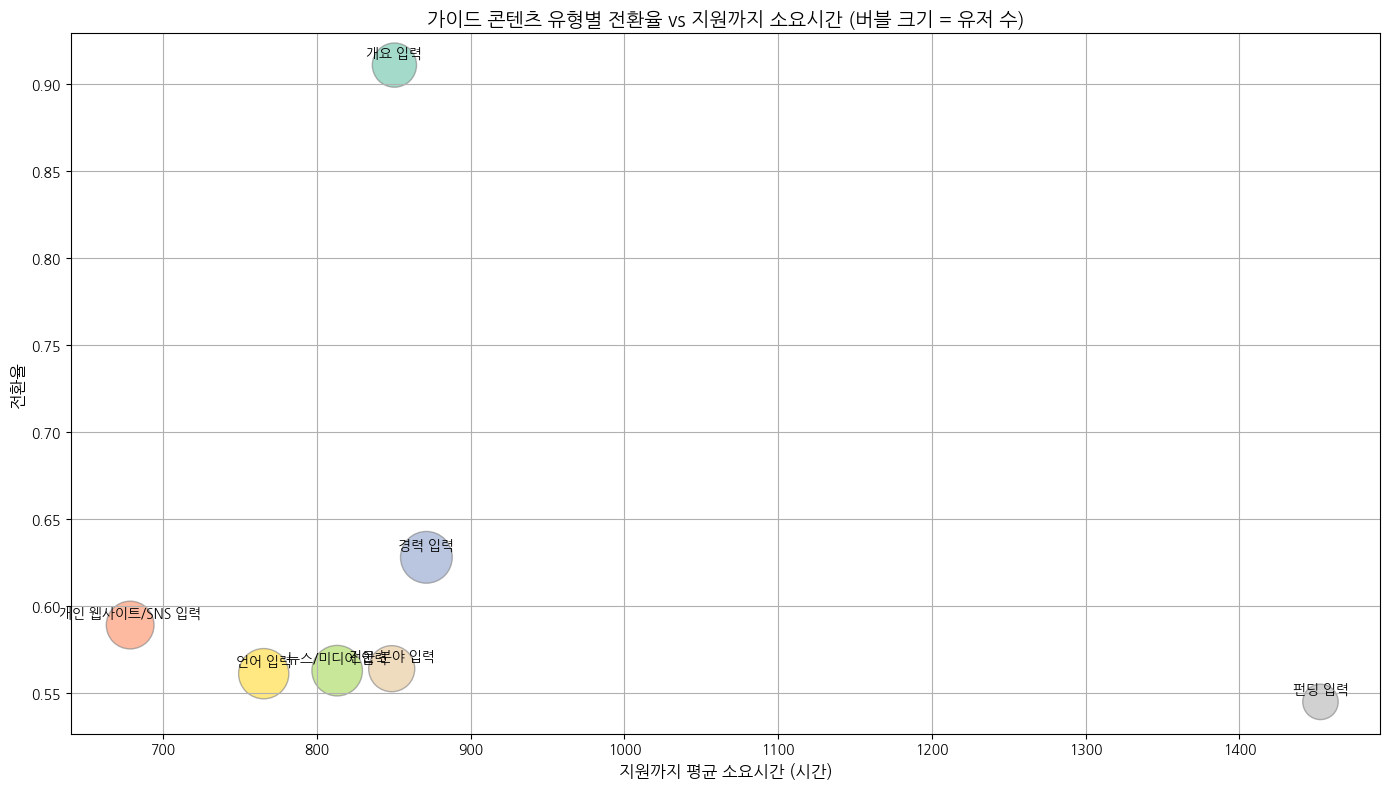

In [47]:
# Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•
data = pd.DataFrame({
    'guide_type': [
        'Í∞úÏöî ÏûÖÎ†•', 'Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•', 'Í≤ΩÎ†• ÏûÖÎ†•',
        'Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•', 'Ïñ∏Ïñ¥ ÏûÖÎ†•', 'Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•', 'ÌéÄÎî© ÏûÖÎ†•'
    ],
    'Ïú†Ï†Ä Ïàò': [2025, 2363, 2774, 2647, 2616, 2202, 1301],
    'Ï†ÑÌôòÏú®': [0.910617, 0.589082, 0.627974, 0.562901, 0.561162, 0.564033, 0.544965],
    'ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)': [850.457033, 678.601934, 871.239686, 813.227392, 765.447460, 848.687363, 1452.702464]
})

# Î≤ÑÎ∏î Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=data['ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)'],
    y=data['Ï†ÑÌôòÏú®'],
    s=data['Ïú†Ï†Ä Ïàò'] / 2,  # Ïú†Ï†Ä ÏàòÏóê Îî∞Îùº Î≤ÑÎ∏î ÌÅ¨Í∏∞ Ï°∞Ï†ï
    alpha=0.6,
    c=range(len(data)),
    cmap='Set2',
    edgecolors='grey'
)

# ÌÖçÏä§Ìä∏ ÎùºÎ≤® Ï∂îÍ∞Ä
for i, row in data.iterrows():
    plt.text(row['ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ(ÏãúÍ∞Ñ)'], row['Ï†ÑÌôòÏú®'] + 0.005, row['guide_type'], fontsize=10, ha='center')

# Ï∂ï ÎùºÎ≤® Î∞è Ï†úÎ™©
plt.xlabel('ÏßÄÏõêÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöîÏãúÍ∞Ñ (ÏãúÍ∞Ñ)', fontsize=12)
plt.ylabel('Ï†ÑÌôòÏú®', fontsize=12)
plt.title('Í∞ÄÏù¥Îìú ÏΩòÌÖêÏ∏† Ïú†ÌòïÎ≥Ñ Ï†ÑÌôòÏú® vs ÏßÄÏõêÍπåÏßÄ ÏÜåÏöîÏãúÍ∞Ñ (Î≤ÑÎ∏î ÌÅ¨Í∏∞ = Ïú†Ï†Ä Ïàò)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
sort_log.head()

user_uuid  \
449898  0002535c-eacb-456b-a620-92c917332ba3   
449899  0002535c-eacb-456b-a620-92c917332ba3   
449945  0002535c-eacb-456b-a620-92c917332ba3   
449931  0002535c-eacb-456b-a620-92c917332ba3   
449907  0002535c-eacb-456b-a620-92c917332ba3   

                                              URL                 timestamp  \
449898  @user_id?action=request_approval_complete 2022-01-15 16:44:06+09:00   
449899                      api/users/id/template 2022-01-15 16:44:08+09:00   
449945  @user_id?action=request_approval_complete 2022-03-01 14:45:33+09:00   
449931                      api/users/id/template 2022-03-01 14:45:35+09:00   
449907  @user_id?action=request_approval_complete 2022-04-19 00:12:10+09:00   

              date  response_code method                         prev_time  \
449898  2022-01-15            200    GET                               NaN   
449899  2022-01-15            200   POST  2022-01-15 16:44:06.150657+09:00   
449945  2022-03-01            200    GET  2022-01-15 16:44:08.578129+09:00   
449931  2022-03-01            200   POST  2022-03-01 14:45:33.359728+09:00   
449907  2022-04-19            200    GET  2022-03-01 14:45:35.489070+09:00   

           time_diff  new_session  session_id            cleaned_URL  \
449898           NaN         True           1               @user_id   
449899  2.427472e+00        False           1  api/users/id/template   
449945  3.880885e+06         True           2               @user_id   
449931  2.129342e+00        False           2  api/users/id/template   
449907  4.181195e+06         True           3               @user_id   

                            query_params action_type  is_guide_user  hour  \
449898  action=request_approval_complete          Í∏∞ÌÉÄ          False    16   
449899                               NaN   ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï          False    16   
449945  action=request_approval_complete          Í∏∞ÌÉÄ          False    14   
449931                               NaN   ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï          False    14   
449907  action=request_approval_complete          Í∏∞ÌÉÄ          False     0   

       guide_type  
449898        NaN  
449899        NaN  
449945        NaN  
449931        NaN  
449907        NaN

In [49]:
df = sort_log.copy()

In [50]:
# Ïú†Ï†ÄÎ≥Ñ Ï≤´ Î∞©Î¨∏Ïùº
first_seen = df.groupby("user_uuid")["timestamp"].min().reset_index()
first_seen.columns = ["user_uuid", "first_seen"]

# Ïú†Ï†Ä ÌÉÄÏûÖ Î∂ÑÎ•ò (Ïã†Í∑ú/Í∏∞Ï°¥)
df = df.merge(first_seen, on="user_uuid", how="left")
df["user_type"] = df["timestamp"].dt.date == df["first_seen"].dt.date
df["user_type"] = df["user_type"].map({True: "Ïã†Í∑ú", False: "Í∏∞Ï°¥"})

# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏù¥Îìú ÏÇ¨Ïö© Ïó¨Î∂Ä
user_guide_summary = df.groupby(["user_uuid", "user_type"])["is_guide_user"].max().reset_index()

# Ïú†Ï†Ä ÌÉÄÏûÖÎ≥Ñ Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†
guide_usage_by_user_type = user_guide_summary.groupby("user_type")["is_guide_user"].agg(["mean", "count"])
guide_usage_by_user_type.columns = ["Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†", "Ïú†Ï†Ä Ïàò"]

print("üîπ Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•† ÏöîÏïΩ:")
print(guide_usage_by_user_type)

üîπ Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•† ÏöîÏïΩ:
            Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†   Ïú†Ï†Ä Ïàò
user_type                 
Í∏∞Ï°¥         0.239787  18579
Ïã†Í∑ú         0.212426  21085


In [51]:
# ÌñâÎèô Ïú†ÌòïÎ≥Ñ ÎπàÎèÑ
action_dist = df.groupby(["user_type", "action_type"]).size().reset_index(name="count")

# ÌîºÎ≤óÌï¥ÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å
pivot_action_dist = action_dist.pivot(index="action_type", columns="user_type", values="count").fillna(0)

print("\nüîπ ÌñâÎèô Ïú†Ìòï Î∂ÑÌè¨:")
print(pivot_action_dist)


üîπ ÌñâÎèô Ïú†Ìòï Î∂ÑÌè¨:
user_type                Í∏∞Ï°¥      Ïã†Í∑ú
action_type                        
Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏            327265   28877
Í∞ÄÏù¥Îìú-Í∞úÏöî ÏûÖÎ†•              2624    1496
Í∞ÄÏù¥Îìú-Í∞úÏù∏ ÏõπÏÇ¨Ïù¥Ìä∏/SNS ÏûÖÎ†•     4317    1161
Í∞ÄÏù¥Îìú-Í≤ΩÎ†• ÏûÖÎ†•              4046    1311
Í∞ÄÏù¥Îìú-Îâ¥Ïä§/ÎØ∏ÎîîÏñ¥ ÏûÖÎ†•          3395     834
Í∞ÄÏù¥Îìú-Ïñ∏Ïñ¥ ÏûÖÎ†•              4334    1174
Í∞ÄÏù¥Îìú-Ï†ÑÎ¨∏ Î∂ÑÏïº ÏûÖÎ†•           5157    1498
Í∞ÄÏù¥Îìú-ÌéÄÎî© ÏûÖÎ†•              1527     371
Í≤ÄÏÉâ                   501699  141602
Í∏∞ÏóÖ Íµ¨ÏÑ±Ïõê ÌîÑÎ°úÌïÑ Ï°∞Ìöå        149125    6038
Í∏∞ÌÉÄ                  2424714  161251
Î≥∏Ïù∏Ïù∏Ï¶ù                  10735    8024
Îπà URL                  1449     102
ÏÑ§Ï†ï                    35008    8924
ÏÜåÏÖú Í∏∞Îä•                 86721    5472
ÏïåÎ¶º ÌôïÏù∏                223004   14939
ÏßÄÏõê ÏßÑÌñâ ÏÉÅÌÉú ÌôïÏù∏          108197   23185
ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏             625474   33916
ÏßÄÏõêÏÑú ÏûëÏÑ± - step1  

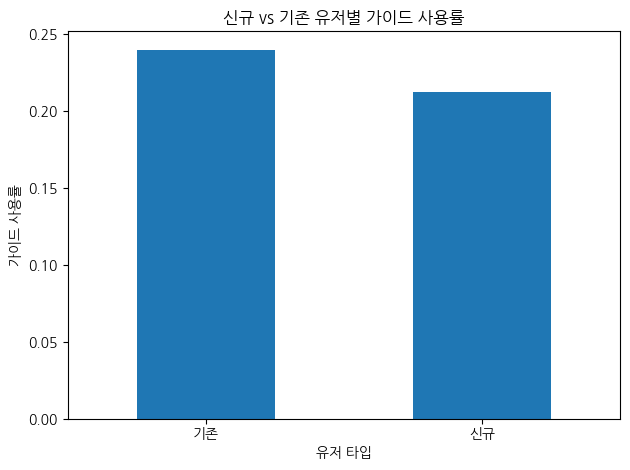

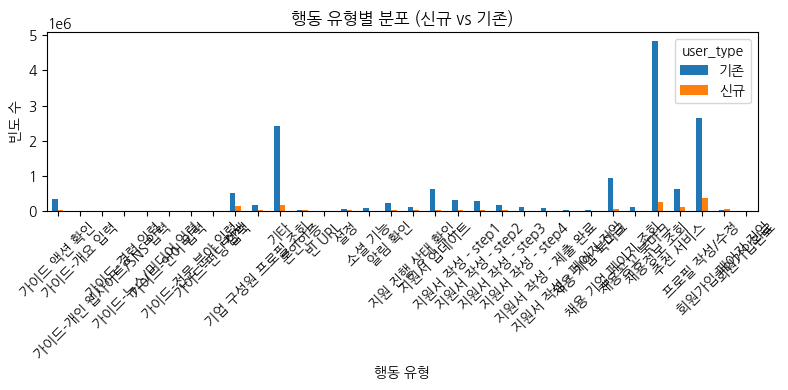

In [52]:
# ÏãúÍ∞ÅÌôî: Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†
fig, ax = plt.subplots()
guide_usage_by_user_type["Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†"].plot(kind="bar", ax=ax, rot=0)
ax.set_title("Ïã†Í∑ú vs Í∏∞Ï°¥ Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†")
ax.set_ylabel("Í∞ÄÏù¥Îìú ÏÇ¨Ïö©Î•†")
ax.set_xlabel("Ïú†Ï†Ä ÌÉÄÏûÖ")
ax.set_xticks(range(len(guide_usage_by_user_type)))
ax.set_xticklabels(guide_usage_by_user_type.index)
plt.tight_layout()
plt.show()

# ÏãúÍ∞ÅÌôî: ÌñâÎèô Î∂ÑÌè¨
pivot_action_dist.plot(kind="bar", figsize=(8, 4))
plt.title("ÌñâÎèô Ïú†ÌòïÎ≥Ñ Î∂ÑÌè¨ (Ïã†Í∑ú vs Í∏∞Ï°¥)")
plt.xlabel("ÌñâÎèô Ïú†Ìòï")
plt.ylabel("ÎπàÎèÑ Ïàò")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# ÏÑ∏ÏÖòÎ≥Ñ ÏãúÍ∞Ñ Ï†ïÎ†¨
df_sorted = df.sort_values(by=["user_uuid", "session_id", "timestamp"])

# Í∞Å Ïú†Ï†Ä-ÏÑ∏ÏÖòÎ≥ÑÎ°ú action_typeÏùÑ ÏãúÍ∞Ñ ÏàúÏúºÎ°ú Ïó∞Í≤∞
session_sequences = df_sorted.groupby(["user_uuid", "session_id"])["action_type"].apply(
    lambda x: " ‚Üí ".join(x.dropna().astype(str))
).reset_index(name="action_sequence")

# ÏãúÌÄÄÏä§Î≥Ñ ÎπàÎèÑ Ïàò ÏßëÍ≥Ñ
sequence_counts = session_sequences["action_sequence"].value_counts().reset_index()
sequence_counts.columns = ["action_sequence", "count"]

# Í≤∞Í≥º Ï∂úÎ†•
print("üîπ ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉÅÏúÑ 10Í∞ú:")
print(sequence_counts.head(10))

üîπ ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉÅÏúÑ 10Í∞ú:
                         action_sequence  count
0                      Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå  55454
1                                Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå  26728
2                         Í∏∞ÌÉÄ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï  24848
3                               ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏  24204
4            Ï±ÑÏö© Í∏∞ÏóÖ ÌéòÏù¥ÏßÄ Ï°∞Ìöå ‚Üí Ï±ÑÏö© Í∏∞ÏóÖ ÌéòÏù¥ÏßÄ Ï°∞Ìöå  19574
5  Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå  17066
6                          Í∏∞ÌÉÄ ‚Üí ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏  16790
7            Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå  14228
8                                     Í∏∞ÌÉÄ  13806
9             Í∏∞ÌÉÄ ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï  11420


In [54]:
# Í∞ÄÏù¥Îìú Ïú†Ï†Ä Ïó¨Î∂Ä Î≥ëÌï©
user_guide_flag = df.groupby("user_uuid")["is_guide_user"].max().reset_index()
session_sequences = session_sequences.merge(user_guide_flag, on="user_uuid", how="left")

# Í∞ÄÏù¥Îìú Ïú†Î¨¥Î≥Ñ ÏãúÌÄÄÏä§ ÎπàÎèÑ
guide_sequence_counts = session_sequences.groupby(["is_guide_user", "action_sequence"]).size().reset_index(name="count")

# ÏÉÅÏúÑ ÏãúÌÄÄÏä§ Î≥¥Í∏∞
print("\nüîπ Í∞ÄÏù¥Îìú Ïú†Ï†Ä ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉÅÏúÑ:")
print(guide_sequence_counts[guide_sequence_counts["is_guide_user"] == True].sort_values("count", ascending=False).head(10))

print("\nüîπ ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉÅÏúÑ:")
print(guide_sequence_counts[guide_sequence_counts["is_guide_user"] == False].sort_values("count", ascending=False).head(10))



üîπ Í∞ÄÏù¥Îìú Ïú†Ï†Ä ÌñâÎèô ÏãúÌÄÄÏä§ ÏÉÅÏúÑ:
        is_guide_user                        action_sequence  count
326458           True                      Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå  17066
294155           True                               ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏  11298
265910           True                         Í∏∞ÌÉÄ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï   8675
320870           True                                Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå   8664
252605           True                          Í∏∞ÌÉÄ ‚Üí ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏   6803
310546           True            Ï±ÑÏö© Í∏∞ÏóÖ ÌéòÏù¥ÏßÄ Ï°∞Ìöå ‚Üí Ï±ÑÏö© Í∏∞ÏóÖ ÌéòÏù¥ÏßÄ Ï°∞Ìöå   5626
219222           True                                     Í∏∞ÌÉÄ   5450
341137           True  Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå   5038
224331           True             Í∏∞ÌÉÄ ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï   4398
337730           True            Ï±ÑÏö©Ï†ïÎ≥¥ Ï°

In [55]:
import plotly.graph_objects as go
import pandas as pd

# ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞: sequence_counts (Ïïû Îã®Í≥Ñ ÏΩîÎìú Ï∞∏Í≥†)
top_n = 5
top_sequences = sequence_counts.head(top_n)["action_sequence"]

# Ï†ÑÏ≤¥ Îã®Í≥Ñ Ï∂îÏ∂ú
steps = []
for seq in top_sequences:
    steps.extend(seq.split(" ‚Üí "))
steps = list(pd.unique(steps))  # Ï§ëÎ≥µ Ï†úÍ±∞, ÏàúÏÑú Ïú†ÏßÄ

# ÎÖ∏Îìú Ïù∏Îç±Ïã±
label_to_index = {label: i for i, label in enumerate(steps)}

# ÎßÅÌÅ¨ ÏÉùÏÑ±
source, target, value = [], [], []

for seq, cnt in sequence_counts.head(top_n).values:
    parts = seq.split(" ‚Üí ")
    for i in range(len(parts) - 1):
        source.append(label_to_index[parts[i]])
        target.append(label_to_index[parts[i + 1]])
        value.append(cnt)

# Sankey Í∑∏Î¶¨Í∏∞
fig = go.Figure(data=[go.Sankey(
    node=dict(label=steps, pad=15, thickness=20, line=dict(color="black", width=0.5)),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="ÏÉÅÏúÑ ÌñâÎèô ÏãúÌÄÄÏä§ Sankey Îã§Ïù¥Ïñ¥Í∑∏Îû®", font_size=10)
fig.show()


C:\Users\user\AppData\Local\Temp\ipykernel_30200\521363567.py:12: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



‚úÖ 1. Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§ ÏÉÅÏúÑ 10Í∞ú Ìï¥ÏÑù
|ÏãúÌÄÄÏä§	|ÏÑ§Î™Ö	|Ìï¥ÏÑù|
|------|------|----|
|Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå|	Î∞òÎ≥µ Ï°∞Ìöå|	Ïú†Ï†ÄÍ∞Ä Ìïú ÏÑ∏ÏÖò ÎÇ¥ÏóêÏÑú Ï±ÑÏö©Í≥µÍ≥†Î•º Î∞òÎ≥µ ÌÉêÏÉâ|
|Í∏∞ÌÉÄ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï|	Í∏∞Ï¥à Ïï°ÏÖò ÌõÑ ÌîÑÎ°úÌïÑ ÏûÖÎ†•|	Í∞ÄÏù¥Îìú ÏóÜÏù¥ÎèÑ Ïú†ÏûÖ ÌõÑ ÌîÑÎ°úÌïÑ ÏûëÏÑ± ÏãúÎèÑ|
|ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏|	Îã®Ïùº Ïï°ÏÖò|	Ïù¥ÎØ∏ ÏßÄÏõêÏÑúÎ•º ÏûëÏÑ±Ìïú Ïú†Ï†ÄÍ∞Ä Îã®Ïàú ÏàòÏ†ï|
|Í∏∞ÌÉÄ ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï|	Í∞ÄÏù¥ÎìúÎ•º Í±∞Ï≥ê ÌîÑÎ°úÌïÑ ÏûëÏÑ±|	Ïú†Ï†ÄÍ∞Ä Í∞ÄÏù¥ÎìúÎ•º Îî∞Îùº Ïã§Ïßà ÌñâÎèôÏúºÎ°ú Ïù¥Ïñ¥Ïßê ‚Üí Îß§Ïö∞ Í∏çÏ†ïÏ†Å ÌùêÎ¶Ñ|

‚úÖ 2. Í∞ÄÏù¥Îìú Ïú†Ï†Ä vs ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä ÎπÑÍµê

üî∑ Í≥µÌÜµÏ†ê
- Îëê Í∑∏Î£π Î™®Îëê Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞Ìöå ‚Üí Ï±ÑÏö©Ï†ïÎ≥¥ Ï°∞ÌöåÍ∞Ä 1ÏúÑ ‚Üí ÌÉêÏÉâ Ï§ëÏã¨
- Í∏∞ÌÉÄ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï, Í∏∞ÌÉÄ ‚Üí ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏ Îì± Í∏∞Î≥∏Ï†ÅÏù∏ ÌùêÎ¶ÑÏùÄ Ïú†ÏÇ¨

üî∂ Í∞ÄÏù¥Îìú Ïú†Ï†Ä ÌäπÏßï
|ÏãúÌÄÄÏä§|	ÏùòÎØ∏|	Ïù∏ÏÇ¨Ïù¥Ìä∏|
|----|--------|----------|
|Í∏∞ÌÉÄ ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï|	Í∞ÄÏù¥Îìú Í±∞Ï≥ê ÌñâÎèô|	Í∞ÄÏù¥ÎìúÍ∞Ä Î™ÖÌôïÌïú ÌñâÎèô Ïú†ÎèÑ Ïó≠Ìï†ÏùÑ ÌïòÍ≥† ÏûàÏùå|
|Í∏∞ÌÉÄ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï, Í∏∞ÌÉÄ ‚Üí ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏|	ÏßÅÏ†ë ÌñâÎèô|	Í∞ÄÏù¥ÎìúÎ•º Í±¥ÎÑàÎõ∞Îäî Ïú†Ï†ÄÎèÑ ÏûàÏúºÎÇò, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎπÑÏú® ÎÇÆÏùå|
- ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖòÏùÑ Í±∞ÏπòÎ©¥ Ïù¥ÌõÑ ÌñâÎèôÏúºÎ°úÏùò Ï†ÑÌôòÎ•†Ïù¥ ÎÜíÎã§Îäî Í≤ÉÏùÑ ÌñâÎèô Í≤ΩÎ°úÏóêÏÑúÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

üî¥ ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä ÌäπÏßï
|ÏãúÌÄÄÏä§|	ÏùòÎØ∏|	Ïù∏ÏÇ¨Ïù¥Ìä∏|
|-----|-------|-----------|
|Í∏∞ÌÉÄ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï, Í∏∞ÌÉÄ ‚Üí ÏßÄÏõêÏÑú ÏóÖÎç∞Ïù¥Ìä∏|	ÌñâÎèô ÏãúÎèÑÎäî ÌïòÏßÄÎßå‚Ä¶	|Í∞ÄÏù¥ÎìúÎ•º Í±∞ÏπòÏßÄ ÏïäÏïÑ Ï§ëÍ∞Ñ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ÎÜíÏùå|
|Í∏∞ÌÉÄ ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖò ÌôïÏù∏ ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ïÎèÑ Ï°¥Ïû¨|	ÏûêÏó∞ Ïú†ÏûÖ ÏãúÎèÑ|	ÏùºÎ∂ÄÎäî Í∞ÄÏù¥Îìú ÎÖ∏Ï∂úÏùÑ ÌõÑÏÜçÏ†ÅÏúºÎ°ú Í≤ΩÌóòÌï® (ÌïòÏßÄÎßå ÎπÑÏú® ÎÇÆÏùå)|

- ‚Üí ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†ÄÎäî ÌÉêÏÉâÏùÄ ÌôúÎ∞úÌïòÎÇò ÌñâÎèô Ï†ÑÌôòÏùÄ ÎÇÆÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå

üìå Í≤∞Î°† ÏöîÏïΩ
- Í∞ÄÏù¥Îìú Ïú†Ï†ÄÎäî Î≥¥Îã§ Íµ¨Ï°∞ÌôîÎêú ÌñâÎèô ÌùêÎ¶ÑÏùÑ Î≥¥Ïù¥Î©∞, Ïã§ÏßàÏ†Å Ï†ÑÌôòÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî Í≤ΩÎ°úÍ∞Ä ÎààÏóê Îùî
- ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†ÄÎäî ÌÉêÏÉâÏù¥ Î∞òÎ≥µÎêòÍ±∞ÎÇò, ÌñâÎèôÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÏßÄ ÏïäÎäî Í≤ΩÏö∞Í∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎßéÏùå
- Í∏∞ÌÉÄ ‚Üí Í∞ÄÏù¥Îìú Ïï°ÏÖò ‚Üí ÌîÑÎ°úÌïÑ ÏûëÏÑ± Í∞ôÏùÄ ÌùêÎ¶ÑÏùÄ Ïò®Î≥¥Îî© Í∞ÄÏù¥ÎìúÍ∞Ä Ïã§Ï†ú ÌñâÎèô Ïú†ÎèÑÏóê Í∏∞Ïó¨ÌïòÍ≥† ÏûàÎã§Îäî Í∞ïÎ†•Ìïú Í∑ºÍ±∞

## Í∞ÄÏù¥Îìú Ïï°ÏÖò ‚Üí LTV Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±

‚úÖ 1. Í∞ÄÏù¥Îìú Ïï°ÏÖò ‚Üí LTV Ï¶ùÍ∞Ä Í∞ÄÎä•ÏÑ±
- Ïôú Ïó∞Í≤∞ÎêòÎÇò?
- Í∞ÄÏù¥Îìú Í∏∞Îä•ÏùÄ Îã®Í∏∞ ÌñâÎèô(ÏßÄÏõêÏÑú ÏûëÏÑ± Îì±)Î≥¥Îã§ Ïû¨ÏßÄÏõê/Ïû•Í∏∞ Í¥ÄÏó¨ ÌñâÎèôÏóê Îçî Í∞ïÌïòÍ≤å Ïó∞Í≤∞Îê®
- Ïã§Ï†ú Î∂ÑÏÑù Í≤∞Í≥ºÏóêÏÑúÎèÑ Í∞ÄÏù¥Îìú Ïú†Ï†ÄÏùò Ïû¨ÏßÄÏõêÎ•†Ïù¥ 36.8% Îçî ÎÜíÏùå ‚Üí Ïù¥ ÏûêÏ≤¥Í∞Ä LTVÏùò Ï¶ùÍ±∞

| LTV Íµ¨ÏÑ± ÏöîÏÜå          | Ïó∞Í≤∞ Í∞ÄÎä•Ìïú ÏßÄÌëú                          |
| ------------------ | ---------------------------------- |
| üéØ Ï†ÑÌôòÏú®             | ÌçºÎÑê Î∂ÑÏÑù: `ÌîÑÎ°úÌïÑ ÏûëÏÑ±/ÏàòÏ†ï ‚Üí ÏßÄÏõêÏÑú Ï†úÏ∂ú`ÍπåÏßÄ      |
| üîÅ Î¶¨ÌÖêÏÖò             | ÏõîÎ≥Ñ Ïû¨Î∞©Î¨∏/Ïû¨ÏßÄÏõê Ïó¨Î∂Ä (`user_uuid + date`) |
| üí∏ ÏàòÏùµ(ÎòêÎäî Í∞ÄÏπò proxy) | ÌèâÍ∑† ÏßÄÏõê ÌöüÏàò, Ïû¨ÏßÄÏõê ÎπÑÏú®, Ïû•Í∏∞ ÏÑ∏ÏÖò Ïàò Îì±        |
| ‚è± ÌñâÎèô ÏßÄÏÜç Í∏∞Í∞Ñ         | Ï≤´ Î∞©Î¨∏ \~ ÎßàÏßÄÎßâ ÌñâÎèô ÏãúÍ∞Ñ Í∞ÑÍ≤©               |

In [56]:
# Ïú†Ï†ÄÎ≥Ñ ÏÉùÏï† ÌñâÎèô Ïàò (proxy for engagement depth)
ltv_proxy = df.groupby("user_uuid").agg(
    first_action=("timestamp", "min"),
    last_action=("timestamp", "max"),
    action_count=("action_type", "count")
)
ltv_proxy["duration_days"] = (ltv_proxy["last_action"] - ltv_proxy["first_action"]).dt.days
ltv_proxy["ltv_score"] = ltv_proxy["action_count"] * ltv_proxy["duration_days"]  # Îã®Ïàú ÌîÑÎ°ùÏãú

# Í∞ÄÏù¥Îìú Ïú†Ï†ÄÏôÄ ÎπÑÍµê
user_guide_flag = df.groupby("user_uuid")["is_guide_user"].max().reset_index()
ltv_merged = pd.merge(ltv_proxy, user_guide_flag, on="user_uuid")

# ÌèâÍ∑† ÎπÑÍµê
ltv_merged.groupby("is_guide_user")[["ltv_score", "action_count", "duration_days"]].mean()

ltv_score  action_count  duration_days
is_guide_user                                            
False          267503.968445    558.003974     286.474467
True           687372.144452   1489.292253     363.183077

| ÏßÄÌëú                                 | ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä     | Í∞ÄÏù¥Îìú Ïú†Ï†Ä      | Ï∞®Ïù¥Ï†ê       | Ìï¥ÏÑù                                                      |
| ---------------------------------- | ----------- | ----------- | --------- | ------------------------------------------------------- |
| **ltv\_score**<br>(= ÌñâÎèô Ïàò √ó ÌôúÎèôÏùº Ïàò) | **267,504** | **687,372** | **+157%** | ÌîåÎû´Ìèº ÎÇ¥ ÌôúÎèôÎüâÍ≥º ÏßÄÏÜç Í∏∞Í∞ÑÏùÑ Î∞òÏòÅÌïú **LTV ÌîÑÎ°ùÏãú**Î°ú, Í∞ÄÏù¥Îìú Ïú†Ï†ÄÍ∞Ä ÏïΩ 2.6Î∞∞ Îçî ÎÜíÏùå |
| **action\_count**<br>(Ï¥ù ÌñâÎèô Ïàò)      | 558Ìöå        | 1,489Ìöå      | **+166%** | Í∞ÄÏù¥Îìú Ïú†Ï†ÄÍ∞Ä Ìõ®Ïî¨ Îçî ÎßéÏùÄ ÌñâÎèôÏùÑ Ìï®                                   |
| **duration\_days**<br>(ÌôúÎèô ÏßÄÏÜçÏùº)     | 286Ïùº        | 363Ïùº        | **+27%**  | Í∞ÄÏù¥Îìú Ïú†Ï†ÄÍ∞Ä Îçî Ïò§Îûò ÏÑúÎπÑÏä§Ïóê Î®∏Î¨¥Î¶Ñ                                   |

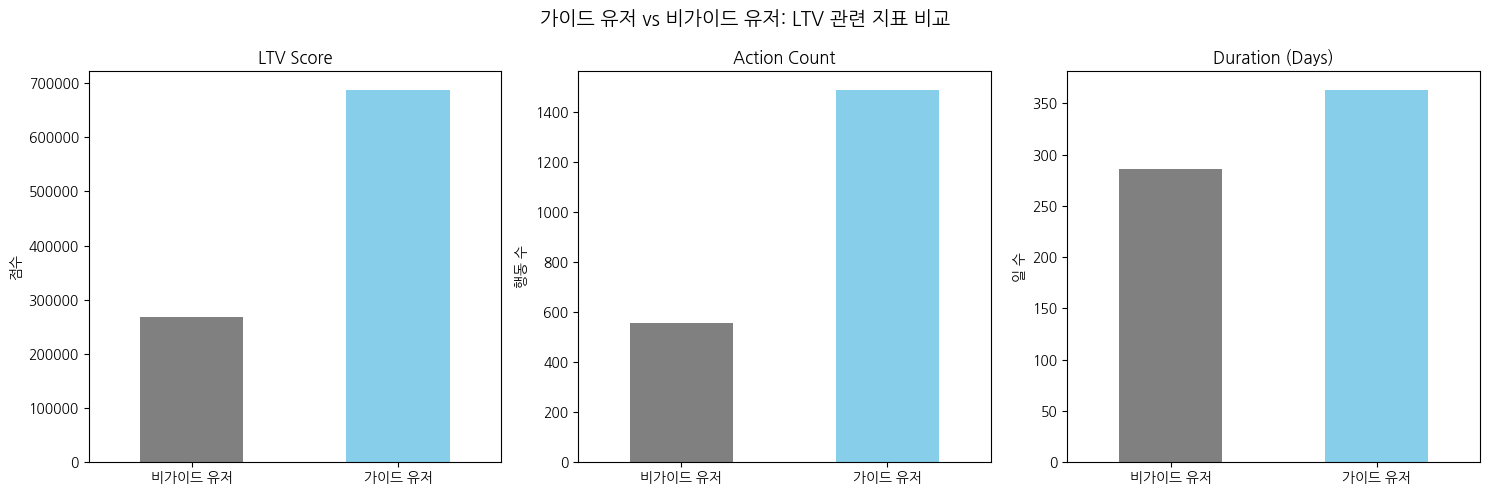

In [57]:
import matplotlib.pyplot as plt

# LTV ÎπÑÍµêÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
ltv_means = {
    "LTV Score": [267503.97, 687372.14],
    "Action Count": [558.00, 1489.29],
    "Duration (Days)": [286.47, 363.18]
}
index = ["ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä", "Í∞ÄÏù¥Îìú Ïú†Ï†Ä"]

ltv_df = pd.DataFrame(ltv_means, index=index)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ltv_df["LTV Score"].plot(kind="bar", ax=axes[0], title="LTV Score", color=["gray", "skyblue"])
axes[0].set_ylabel("Ï†êÏàò")

ltv_df["Action Count"].plot(kind="bar", ax=axes[1], title="Action Count", color=["gray", "skyblue"])
axes[1].set_ylabel("ÌñâÎèô Ïàò")

ltv_df["Duration (Days)"].plot(kind="bar", ax=axes[2], title="Duration (Days)", color=["gray", "skyblue"])
axes[2].set_ylabel("Ïùº Ïàò")

for ax in axes:
    ax.set_xticklabels(index, rotation=0)

plt.suptitle("Í∞ÄÏù¥Îìú Ïú†Ï†Ä vs ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä: LTV Í¥ÄÎ†® ÏßÄÌëú ÎπÑÍµê", fontsize=14)
plt.tight_layout()
plt.show()


| ÏßÄÌëú                  | ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä | Í∞ÄÏù¥Îìú Ïú†Ï†Ä     | Ï∞®Ïù¥            |
| ------------------- | ------- | ---------- | ------------- |
| **LTV Score**       | ÎÇÆÏùå      | 2.6Î∞∞ Ïù¥ÏÉÅ ÎÜíÏùå | ‚úÖ Ïû•Í∏∞ ÌñâÎèô + ÌôúÎèôÎüâ |
| **Action Count**    | 558     | 1,489      | ‚úÖ ÌôúÎèô ÎπàÎèÑÎèÑ ÏïïÎèÑÏ†Å  |
| **Duration (Days)** | 286Ïùº    | 363Ïùº       | ‚úÖ ÌôúÎèô Í∏∞Í∞Ñ Îçî Í∏∏Ïùå  |

In [58]:
from scipy.stats import ttest_ind

# LTV, ÌñâÎèô Ïàò, ÌôúÎèô Í∏∞Í∞Ñ Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ t-test ÏàòÌñâ
def run_ttest(data, column):
    group_guide = data[data["is_guide_user"] == True][column]
    group_noguide = data[data["is_guide_user"] == False][column]
    t_stat, p_value = ttest_ind(group_guide, group_noguide, equal_var=False)
    return t_stat, p_value

# ÏàòÌñâ
results = {}
for col in ["ltv_score", "action_count", "duration_days"]:
    t_stat, p_value = run_ttest(ltv_merged, col)
    results[col] = {"t-stat": round(t_stat, 2), "p-value": round(p_value, 5)}

# Í≤∞Í≥º Î≥¥Í∏∞
for metric, result in results.items():
    print(f"üìä {metric} ‚Üí t = {result['t-stat']}, p = {result['p-value']}")

üìä ltv_score ‚Üí t = 22.34, p = 0.0
üìä action_count ‚Üí t = 33.27, p = 0.0
üìä duration_days ‚Üí t = 19.33, p = 0.0


In [59]:
# ÎÇ†Ïßú Ïª¨ÎüºÏù¥ datetime ÌÉÄÏûÖÏù¥Ïñ¥Ïïº Ìï®
df["timestamp"] = pd.to_datetime(df["timestamp"])

# ÏµúÏ¥à ÌôúÎèô Ïõî (Í∞ÄÏûÖ Cohort)
df["cohort_month"] = df.groupby("user_uuid")["timestamp"].transform("min").dt.to_period("M")

# ÌôúÎèô Ïõî
df["activity_month"] = df["timestamp"].dt.to_period("M")

# Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ (cohort vs activity)
cohort_counts = df.groupby(["cohort_month", "activity_month"])["user_uuid"].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index="cohort_month", columns="activity_month", values="user_uuid")

# Ï≤´ Îã¨ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎ®∏ÏßÄ ÏõîÏùò Ïú†ÏßÄÏú® Í≥ÑÏÇ∞
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

print("üìä Cohort Retention Table")
retention.fillna(0).round(3)

C:\Users\user\AppData\Local\Temp\ipykernel_30200\184089855.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\user\AppData\Local\Temp\ipykernel_30200\184089855.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



üìä Cohort Retention Table


activity_month  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  \
cohort_month                                                                    
2022-01             1.0    0.626    0.579    0.526    0.515    0.485    0.466   
2022-02             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-03             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-04             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-05             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-06             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-07             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-08             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-09             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-10             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-11             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-12             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-01             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-02             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-03             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-04             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-05             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-06             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-07             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-08             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-09             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-10             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-11             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2023-12             0.0    0.000    0.000    0.000    0.000    0.000    0.000   

activity_month  2022-08  2022-09  2022-10  ...  2023-03  2023-04  2023-05  \
cohort_month                               ...                              
2022-01           0.453    0.406    0.394  ...    0.391    0.357    0.338   
2022-02           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-03           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-04           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-05           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-06           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-07           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-08           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-09           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-10           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-11           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2022-12           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-01           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-02           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-03           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-04           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-05           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-06           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-07           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-08           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-09           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-10           0.000    0.000    0.000  ...    0.000    0.000    0.000   
2023-11           0.000    0.000    0.000  ..

In [60]:
# Í∞ÄÏù¥Îìú Ïó¨Î∂Ä Ïú†Ï†ÄÎ≥ÑÎ°ú Ï∂îÏ∂ú
user_guide_flag = df.groupby("user_uuid")["is_guide_user"].max().reset_index()

# Ïú†Ï†Ä ÌÉÄÏûÖ Î≥ëÌï©
df = pd.merge(df, user_guide_flag, on="user_uuid", how="left", suffixes=("", "_user"))

# Í∞ÄÏù¥Îìú/ÎπÑÍ∞ÄÏù¥ÎìúÎ≥ÑÎ°ú ÎÇòÎàÑÏñ¥ cohort Î∂ÑÏÑù
def compute_retention_by_group(df_subset):
    df_subset["cohort_month"] = df_subset.groupby("user_uuid")["timestamp"].transform("min").dt.to_period("M")
    df_subset["activity_month"] = df_subset["timestamp"].dt.to_period("M")
    grouped = df_subset.groupby(["cohort_month", "activity_month"])["user_uuid"].nunique().reset_index()
    pivot = grouped.pivot(index="cohort_month", columns="activity_month", values="user_uuid")
    base = pivot.iloc[:, 0]
    return pivot.divide(base, axis=0)

# Í∞ÄÏù¥Îìú Ïú†Ï†Ä
retention_guide = compute_retention_by_group(df[df["is_guide_user"] == True])
# ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä
retention_noguide = compute_retention_by_group(df[df["is_guide_user"] == False])

print("üî∑ Í∞ÄÏù¥Îìú Ïú†Ï†Ä Î¶¨ÌÖêÏÖò")
print(retention_guide.fillna(0).round(3))

print("\nüî∂ ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä Î¶¨ÌÖêÏÖò")
print(retention_noguide.fillna(0).round(3))


C:\Users\user\AppData\Local\Temp\ipykernel_30200\2477514042.py:9: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\user\AppData\Local\Temp\ipykernel_30200\2477514042.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_30200\2477514042.py:10: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\user\AppData\Local\Temp\ipykernel_30200\2477514042.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

üî∑ Í∞ÄÏù¥Îìú Ïú†Ï†Ä Î¶¨ÌÖêÏÖò
activity_month  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  \
cohort_month                                                                    
2022-01             1.0    0.756    0.698    0.635    0.632    0.599    0.582   
2022-02             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-03             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-04             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-05             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-06             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-07             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-08             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-09             0.0    0.000    0.000    0.000    0.000    0.000    0.000   
2022-10             0.0    0.000    0.000    0.000    0.000    0.000    0.000

TypeError: <class 'pandas._libs.tslibs.period.Period'> is not convertible to datetime, at position 0

c:\Users\user\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) NanumGothic.

c:\Users\user\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) NanumGothic.



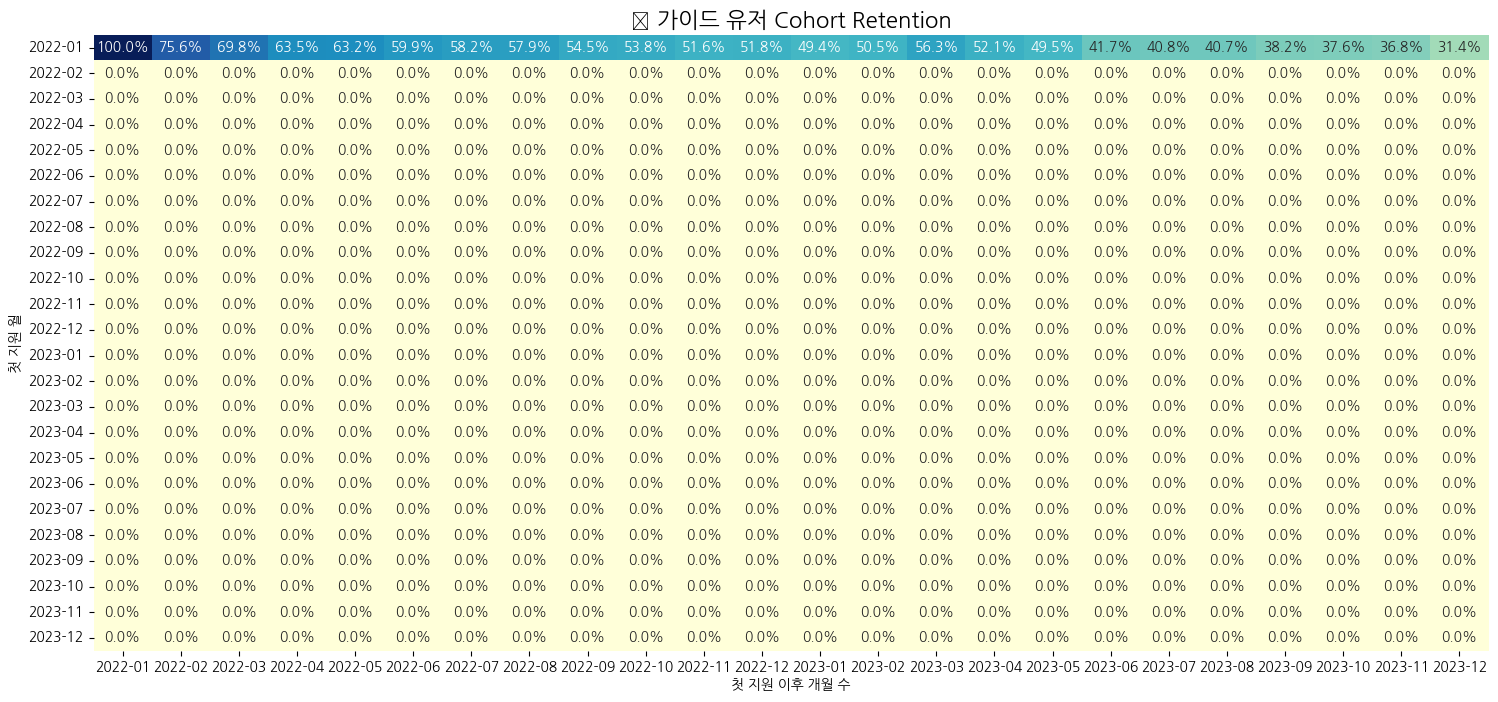

In [61]:
# ÏúÑÏóêÏÑú ÎßåÎì† retention_guide, retention_noguide ÏÇ¨Ïö©

plot_retention_heatmap(retention_guide.fillna(0), "üî∑ Í∞ÄÏù¥Îìú Ïú†Ï†Ä Cohort Retention")
plot_retention_heatmap(retention_noguide.fillna(0), "üî∂ ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä Cohort Retention")

‚úÖ ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏöîÏïΩ
- üéØ 1. Í∞ÄÏù¥ÎìúÎäî Îã®Í∏∞ Ï†ÑÌôòÎ≥¥Îã§ Ïû•Í∏∞ Î¶¨ÌÖêÏÖòÏóê ÌÅ∞ Ìö®Í≥º
- Í∞ÄÏù¥Îìú Ïú†Ï†ÄÎäî ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†ÄÎ≥¥Îã§:

- ÌñâÎèô Ïàò: 2.7Î∞∞

- ÌôúÎèô Í∏∞Í∞Ñ: +27%

- LTV Proxy: 2.6Î∞∞ ÎÜíÏùå

- Ïû¨ÏßÄÏõêÎ•† +36.8% (ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏)

- Ï¶â, Í∞ÄÏù¥ÎìúÎäî Ïú†Ï†ÄÏùò "ÏàòÎ™Ö"ÏùÑ ÎäòÎ¶¨Í≥†, Ï∞∏Ïó¨Î•º Î∞òÎ≥µÌïòÍ≤å ÎßåÎì†Îã§.

| Í∞ÄÏù¥Îìú Ìï≠Î™© | Ï†ÑÌôòÏú®       | ÌèâÍ∑† ÌñâÎèôÍπåÏßÄ ÏÜåÏöî ÏãúÍ∞Ñ |
| ------ | --------- | ------------- |
| Í∞úÏöî ÏûÖÎ†•  | **91.1%** | ÏïΩ 35Ïùº         |
| ÌéÄÎî© ÏûÖÎ†•  | **54.5%** | **60Ïùº Ïù¥ÏÉÅ**    |


‚úÖ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïì∏ÎßåÌïú Ïù¥Ïú†
- 1. Í∞ÄÏù¥Îìú vs ÎπÑÍ∞ÄÏù¥Îìú Ï∞®Ïù¥Í∞Ä Î™ÖÌôï
    - Ïòà: 2022-01 Cohort Í∏∞Ï§Ä

    - Í∞ÄÏù¥Îìú Ïú†Ï†ÄÎäî 12Í∞úÏõî ÌõÑ 31% Ïú†ÏßÄ

    - ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†ÄÎäî 12Í∞úÏõî ÌõÑ 16% Ïú†ÏßÄ

    - ‚Üí ÏïΩ 2Î∞∞ Ïú†ÏßÄÏú® Ï∞®Ïù¥

- 2. ÏãúÍ∞ÑÏóê Îî∞Îùº ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïù¥ÌÉà Í≤ΩÌñ•Ïù¥ Î∞òÏòÅÎê®
    - Ï†êÏ∞®Ï†ÅÏúºÎ°ú retentionÏù¥ Í∞êÏÜåÌïòÎäî Í≥°ÏÑ†Ïù¥ ÎÇòÌÉÄÎÇ®

    - ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∏âÎùΩÏù¥ÎÇò ÎπÑÏñ¥ÏûàÎäî CohortÍ∞Ä Í±∞Ïùò ÏóÜÏùå

    - ‚Üí ÌòÑÏã§Ï†ÅÏù∏ ÌñâÎèô ÌùêÎ¶ÑÏùÑ Î∞òÏòÅÌïú Ï¢ãÏùÄ ÏßÄÌëú

- 3. Ï¥àÍ∏∞ Ïú†ÏûÖ CohortÎßå ÏûàÏßÄÎßå, Ìå®ÌÑ¥ÏùÄ Î™ÖÌôï
    - ÎåÄÎ∂ÄÎ∂ÑÏùò Ïú†Ï†ÄÍ∞Ä 2022-01 CohortÏóê ÏßëÏ§ëÎèº ÏûàÏßÄÎßå

    - Ìï¥Îãπ CohortÏùò 1ÎÖÑÍ∞Ñ Î¶¨ÌÖêÏÖò ÌùêÎ¶ÑÏù¥ ÏôÑÏ†ÑÌïòÍ≤å Î≥¥Ïó¨Ïßê

    - Ïù¥Îäî Ïû•Í∏∞ Ïú†ÏßÄ Ï†ÑÎûµÏùÑ Î∂ÑÏÑùÌïòÍ∏∞Ïóê Ï∂©Î∂ÑÌï®



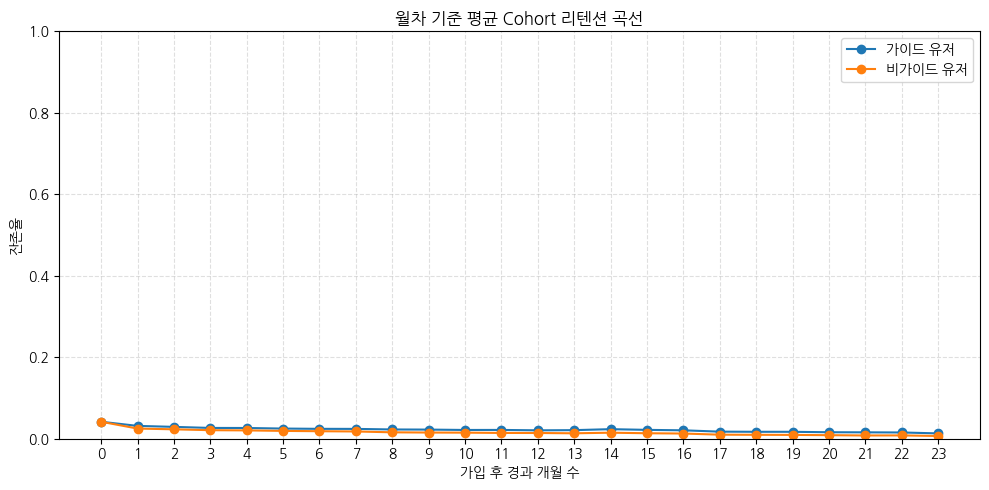

In [ ]:
# Î¶¨ÌÖêÏÖò Í∞íÏù¥ ÏûàÎäî ÏõîÏ∞®Î•º Ïà´ÏûêÌòï indexÎ°ú Î≥ÄÌôò
def prepare_retention_curve(retention_df):
    retention_df = retention_df.copy()
    retention_df.columns = range(retention_df.shape[1])  # 0Í∞úÏõîÏ∞®, 1Í∞úÏõîÏ∞®, ...
    return retention_df

# Ï§ÄÎπÑ
guide_curve = prepare_retention_curve(retention_guide.fillna(0))
noguide_curve = prepare_retention_curve(retention_noguide.fillna(0))

# Í∞Å CohortÎ≥Ñ ÌèâÍ∑† Î¶¨ÌÖêÏÖò Í≥ÑÏÇ∞ (ÏõîÏ∞® Í∏∞Ï§Ä)
guide_avg = guide_curve.mean(axis=0)
noguide_avg = noguide_curve.mean(axis=0)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(guide_avg.index, guide_avg.values, marker='o', label='Í∞ÄÏù¥Îìú Ïú†Ï†Ä')
plt.plot(noguide_avg.index, noguide_avg.values, marker='o', label='ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†Ä')
plt.title("ÏõîÏ∞® Í∏∞Ï§Ä ÌèâÍ∑† Cohort Î¶¨ÌÖêÏÖò Í≥°ÏÑ†")
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò")
plt.ylabel("ÏûîÏ°¥Ïú®")
plt.xticks(guide_avg.index)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind
from numpy import trapz

# Í∞Å CohortÎ≥Ñ AUC Í≥ÑÏÇ∞
guide_auc = guide_curve.apply(lambda row: trapz(row.values), axis=1)
noguide_auc = noguide_curve.apply(lambda row: trapz(row.values), axis=1)

# t-test
t_stat, p_value = ttest_ind(guide_auc, noguide_auc, equal_var=False)
print(f"AUC ÌèâÍ∑† ÎπÑÍµê: t = {t_stat:.3f}, p = {p_value:.5f}")


AUC ÌèâÍ∑† ÎπÑÍµê: t = 0.254, p = 0.80073


- Í∞ÄÏù¥Îìú Ïú†Ï†ÄÏôÄ ÎπÑÍ∞ÄÏù¥Îìú Ïú†Ï†ÄÏùò Ï†ÑÏ≤¥Ï†ÅÏù∏ Î¶¨ÌÖêÏÖò Í≥°ÏÑ†(ÏûîÏ°¥Ïú®Ïùò ÎàÑÏ†Å Ï¥ùÌï©)ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏóàÏäµÎãàÎã§.
- Ï¶â, Îëê Í∑∏Î£πÏù¥ Î¶¨ÌÖêÏÖò Î©¥Ï†Å Ï∏°Î©¥ÏóêÏÑúÎäî Ïã§ÏßàÏ†ÅÏúºÎ°ú ÎπÑÏä∑ÌïòÎã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§.